# LLM Tutorial: Langchain

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)       
**Author:** Kaikai Liu

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

---

🚨 _Note: the above `pip install` is formatted for Jupyter notebooks. If running elsewhere you may need to drop the `!`._

---

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

Start a local colab container: `docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`, copy the link output from the terminal. In Colab, select connect to local runtime and paste the link: http://127.0.0.1:9000/?token=cf72df5a62ed764fd3bce315a542cade27d7984365045cc2

In [76]:
!python -V

Python 3.10.12


In [77]:
import torch
print("Using torch", torch.__version__)

Using torch 2.1.2


In [78]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6994, 0.8194, 0.6805],
        [0.2227, 0.9732, 0.6928],
        [0.7405, 0.3207, 0.5946],
        [0.1837, 0.8045, 0.5796],
        [0.1068, 0.6720, 0.3885]])


In [79]:
import torchvision
print(torchvision.__version__)

0.15.2a0


In [80]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [81]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: mps


In [82]:
torch.cuda.device_count()

0

In [83]:
!echo $LD_LIBRARY_PATH

As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [84]:
torch.manual_seed(42) # Setting the seed

### Setup Langchain

In [85]:
#enter api key in command line
import getpass
import os
LANGCHAIN_API_KEY = getpass.getpass()

In [86]:
!export LANGCHAIN_TRACING_V2="true"

In [87]:
import os

os.environ['LANGCHAIN_API_KEY'] = LANGCHAIN_API_KEY

### Use OpenAI directly

In [88]:
#enter api key in command line
import getpass
import os
OPENAI_API_KEY = getpass.getpass()

Check the list of models here: https://platform.openai.com/docs/models

In [89]:
#!pip install -qU openai
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

In [90]:
response

ChatCompletion(id='chatcmpl-A8GxSUKQpVz2mZ4T3XkoHsXfWtikg', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The 2020 World Series was played at Globe Life Field in Arlington, Texas. This marked the first time the World Series was hosted at a neutral site due to the COVID-19 pandemic.', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1726535174, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_483d39d857', usage=CompletionUsage(completion_tokens=39, prompt_tokens=53, total_tokens=92, completion_tokens_details=CompletionTokensDetails(reasoning_tokens=0)))

In [91]:
len(response.choices)

1

In [92]:
message = response.choices[0].message.content

In [93]:
message

'The 2020 World Series was played at Globe Life Field in Arlington, Texas. This marked the first time the World Series was hosted at a neutral site due to the COVID-19 pandemic.'

In [94]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

## Langchain quickstart

https://github.com/pinecone-io/examples/blob/master/learn/generation/langchain/handbook/00-langchain-intro.ipynb


In [95]:
!pip install -qU langchain

^C


In [25]:
!pip install -qU langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00


In [9]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 15.5 MB/s eta 0:00:00


### Langchain Chat models with OpenAI

LangChain supports many different language models that you can use interchangably

Chat Models are newer forms of language models that take messages in and output a message.



In [1]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")#"gpt-4")

In [2]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Tell me more about Olympic 2028!"),
]

model.invoke(messages)

AIMessage(content="The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, are scheduled to take place in Los Angeles, California, from July 14 to July 30, 2028. This will mark the third time that Los Angeles has hosted the Summer Olympics, having previously done so in 1932 and 1984.\n\n### Key Details:\n\n1. **Host City**: Los Angeles, California, USA\n2. **Dates**: July 14 to July 30, 2028\n3. **Number of Sports**: The Olympics will feature a variety of sports, with the exact number and events to be finalized closer to the event. Traditionally, there are around 30 sports.\n4. **Venues**: Events will be held at various iconic venues across Los Angeles and surrounding areas. Some of the major venues include:\n   - The Los Angeles Memorial Coliseum\n   - SoFi Stadium (home of the Los Angeles Rams and Chargers)\n   - The Staples Center (home to the Lakers and Clippers)\n   - The newly built Intuit Dome\n   - Other venues throughout the region, including some in nea

pass the entire conversation history into the model

In [3]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="Tell me more about Olympic 2028!"),
    ]
)

AIMessage(content="The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, are scheduled to be held in Los Angeles, California. This will mark the third time Los Angeles has hosted the Olympics, having previously done so in 1932 and 1984.\n\n### Key Details:\n- **Dates**: The games are set to take place from July 14 to July 30, 2028.\n- **Venues**: Events will be held at various venues across Los Angeles and surrounding areas. Some of the notable sites include the Los Angeles Memorial Coliseum, which has hosted Olympic events in the past, and the newly built SoFi Stadium in Inglewood.\n- **Sustainability**: The LA 2028 Organizing Committee has emphasized sustainability, planning to use existing venues and infrastructure to minimize environmental impact.\n- **Sports**: The 2028 Olympics will feature a range of sports, including traditional Olympic sports as well as some newer additions that have become popular, like skateboarding and surfing.\n- **Community Engage

### Message History

We can use a Message History class to wrap our model and make it stateful. This will keep track of inputs and outputs of the model, and store them in some datastore.

In [4]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]


with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [5]:
config = {"configurable": {"session_id": "abc2"}}
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Bob")],
    config=config,
)

response.content

'Hi Bob! How can I assist you today?'

This function is expected to take in a session_id and return a Message History object. This session_id is used to distinguish between separate conversations, and should be passed in as part of the config when calling the new chain

### Prompt

Prompt templates help to translate user input and parameters into instructions for a language model. This can be used to guide a model's response, helping it understand the context and generate relevant and coherent language-based output.

LangChain supports several LLM providers, like Hugging Face and OpenAI.

Prompt Templates take as input a dictionary, where each key represents a variable in the prompt template to fill in.

Prompt Templates output a PromptValue. This PromptValue can be passed to an LLM or a ChatModel, and can also be cast to a string or a list of messages. The reason this PromptValue exists is to make it easy to switch between strings and messages.

There are a few different types of prompt templates:

[String PromptTemplates](https://python.langchain.com/v0.2/api_reference/core/prompts/langchain_core.prompts.prompt.PromptTemplate.html):
These prompt templates are used to format a single string, and generally are used for simpler inputs. For example, a common way to construct and use a PromptTemplate is as follows:

In [6]:
from langchain_core.prompts import PromptTemplate

string_prompt = PromptTemplate.from_template("Tell me more about {topic}")

string_prompt.invoke({"topic": "Olympic 2028"})

StringPromptValue(text='Tell me more about Olympic 2028')

[ChatPromptTemplates](https://python.langchain.com/v0.2/api_reference/core/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html):
These prompt templates are used to format a list of messages. These "templates" consist of a list of templates themselves. For example, a common way to construct and use a ChatPromptTemplate is as follows:

In [7]:
from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant"),
    ("user", "Tell me more about {topic}")
])

chat_prompt.invoke({"topic": "Olympic 2028"})

ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Tell me more about Olympic 2028', additional_kwargs={}, response_metadata={})])

The second is a HumanMessage, and will be formatted by the topic variable the user passes in.



ChatPromptValue that consists of two messages. If we want to access the messages directly we do:

In [8]:
result = chat_prompt.invoke({"topic": "Olympic 2028"})
result.to_messages()

[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Tell me more about Olympic 2028', additional_kwargs={}, response_metadata={})]

Invoke the Open AI model with string prompt

In [9]:
model.invoke(string_prompt.invoke({"topic": "Olympic 2028"}))

AIMessage(content="The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, are scheduled to take place in Los Angeles, California, from July 14 to July 30, 2028. This will mark the third time that Los Angeles has hosted the Summer Olympics, having previously done so in 1932 and 1984.\n\n### Key Highlights:\n\n1. **Host City**: Los Angeles was awarded the Games on September 13, 2017, during the 131st IOC Session in Lima, Peru. The selection was part of a unique arrangement where the International Olympic Committee (IOC) also awarded the 2024 Summer Olympics to Paris.\n\n2. **Venues**: The events will be held across various iconic venues in and around Los Angeles. Some of the notable venues include:\n   - **Los Angeles Memorial Coliseum**: A historic venue that has hosted the Olympics before.\n   - **SoFi Stadium**: A state-of-the-art facility that will host events such as football and ceremonies.\n   - **Staples Center**: A prominent venue for basketball and other

Invoke the Open AI model with chat prompt

In [10]:
model.invoke(chat_prompt.invoke({"topic": "Olympic 2028"}))

AIMessage(content="The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, will be held in Los Angeles, California, USA. This will mark the third time that Los Angeles has hosted the Summer Olympics, having previously done so in 1932 and 1984.\n\n### Key Facts:\n\n- **Dates**: The Games are scheduled to take place from July 14 to July 30, 2028.\n- **Venues**: Events will be held in various venues across Los Angeles and surrounding areas. Key venues include the Los Angeles Memorial Coliseum, SoFi Stadium, and the Staples Center. There are plans to utilize existing facilities and infrastructure, which aligns with the Olympic Agenda 2020 initiative promoting sustainability.\n- **Athlete Participation**: The event is expected to attract thousands of athletes from around the world, competing in a wide range of sports.\n- **Sustainability**: The Los Angeles Organizing Committee is emphasizing sustainability and community engagement, aiming to minimize the environmental

### Create Parser and Chain

In [12]:
from langchain_core.output_parsers import StrOutputParser

In [13]:
#Create parser
parser = StrOutputParser()

We can now combine this with the model and the output parser from above using the pipe (|) operator:

In [14]:
#Create chain
chain = string_prompt | model | parser

In [15]:
chain

PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='Tell me more about {topic}')
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x12056d930>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x12056fa30>, root_client=<openai.OpenAI object at 0x106ad8ac0>, root_async_client=<openai.AsyncOpenAI object at 0x12056d990>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))
| StrOutputParser()

In [16]:
chain.invoke({"topic": "Olympic 2028"})

'The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, will be held in Los Angeles, California, from July 14 to July 30, 2028. This will mark the third time that Los Angeles has hosted the Summer Olympics, following the events in 1932 and 1984. \n\n### Key Details:\n\n1. **Host City Selection**: Los Angeles was awarded the Games on September 13, 2017, during the 131st International Olympic Committee (IOC) Session in Lima, Peru. The decision was part of a unique bid process where LA was selected alongside Paris, which will host the 2024 Summer Olympics.\n\n2. **Venues**: The events will take place across a variety of venues, many of which are existing facilities. Key venues include:\n   - Los Angeles Memorial Coliseum\n   - SoFi Stadium\n   - Staples Center\n   - The newly built Intuit Dome\n   - Various venues in the surrounding regions, including beach and mountain events.\n\n3. **Sustainability and Innovation**: The LA 2028 organizing committee has emphasized

### Langchain Cache

In [39]:
# from langchain_openai import OpenAI
# llm = OpenAI(model="gpt-3.5-turbo-instruct", n=2, best_of=2) #Generates best_of completions server-side and returns the "best"

In [20]:
llm=model

LangChain provides an optional caching layer for LLMs. This is useful for two reasons:

It can save you money by reducing the number of API calls you make to the LLM provider, if you're often requesting the same completion multiple times. It can speed up your application by reducing the number of API calls you make to the LLM provider.



In [19]:
from langchain_core.caches import InMemoryCache
from langchain_core.globals import set_llm_cache

set_llm_cache(InMemoryCache())

In [21]:
%%time
# The first time, it is not yet in cache, so it should take longer
llm.invoke("Tell me more about Olympic 2028")


CPU times: user 12.1 ms, sys: 2.61 ms, total: 14.7 ms
Wall time: 5.87 s


AIMessage(content='The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, are scheduled to be held in Los Angeles, California, from July 14 to July 30, 2028. This will mark the third time that Los Angeles has hosted the Summer Olympics, having previously done so in 1932 and 1984.\n\n### Key Highlights:\n\n1. **Historical Significance**: Los Angeles is the first city in the United States to host the Summer Olympics three times. The city was awarded the Games in a unique bid process that also included an agreement to host the 2024 Olympics, which were eventually awarded to Paris.\n\n2. **Venues**: The events will take place across a variety of venues, including many existing facilities. Key venues include:\n   - **Los Angeles Memorial Coliseum**: A historic venue that has hosted the Olympics twice before.\n   - **SoFi Stadium**: A state-of-the-art stadium located in Inglewood, which will host events like football.\n   - **Staples Center**: A well-known arena for b

In [22]:
%%time
# The second time it is, so it goes faster
llm.invoke("Tell me more about Olympic 2028")

CPU times: user 529 µs, sys: 28 µs, total: 557 µs
Wall time: 555 µs


AIMessage(content='The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, are scheduled to be held in Los Angeles, California, from July 14 to July 30, 2028. This will mark the third time that Los Angeles has hosted the Summer Olympics, having previously done so in 1932 and 1984.\n\n### Key Highlights:\n\n1. **Historical Significance**: Los Angeles is the first city in the United States to host the Summer Olympics three times. The city was awarded the Games in a unique bid process that also included an agreement to host the 2024 Olympics, which were eventually awarded to Paris.\n\n2. **Venues**: The events will take place across a variety of venues, including many existing facilities. Key venues include:\n   - **Los Angeles Memorial Coliseum**: A historic venue that has hosted the Olympics twice before.\n   - **SoFi Stadium**: A state-of-the-art stadium located in Inglewood, which will host events like football.\n   - **Staples Center**: A well-known arena for b

In [23]:
# We can do the same thing with a SQLite cache
from langchain_community.cache import SQLiteCache

set_llm_cache(SQLiteCache(database_path=".langchain.db"))

In [24]:
%%time
# The first time, it is not yet in cache, so it should take longer
llm.invoke("Tell me about Olympic 2024")

CPU times: user 17.5 ms, sys: 3.66 ms, total: 21.2 ms
Wall time: 3.46 s


AIMessage(content='The 2024 Summer Olympics, officially known as the Games of the XXXIII Olympiad, are set to take place in Paris, France, from July 26 to August 11, 2024. This will mark the third time that Paris has hosted the Summer Olympics, having previously done so in 1900 and 1924.\n\n### Key Highlights:\n\n1. **Opening Ceremony**: The opening ceremony is planned to be quite unique, taking place along the River Seine rather than in a traditional stadium. This will allow for a larger audience and a picturesque setting, showcasing the city\'s landmarks.\n\n2. **Sports and Events**: The 2024 Olympics will feature a total of 32 sports, including traditional events like athletics, swimming, and gymnastics. New sports such as breakdancing (officially called "breaking") will also be included. The event will see participation from thousands of athletes from around the world, competing for medals in various disciplines.\n\n3. **Venues**: Many events will be held in iconic locations throug

In [25]:
%%time
# The second time
llm.invoke("Tell me about Olympic 2024")

CPU times: user 14.2 ms, sys: 6.62 ms, total: 20.8 ms
Wall time: 18.9 ms


AIMessage(content='The 2024 Summer Olympics, officially known as the Games of the XXXIII Olympiad, are set to take place in Paris, France, from July 26 to August 11, 2024. This will mark the third time that Paris has hosted the Summer Olympics, having previously done so in 1900 and 1924.\n\n### Key Highlights:\n\n1. **Opening Ceremony**: The opening ceremony is planned to be quite unique, taking place along the River Seine rather than in a traditional stadium. This will allow for a larger audience and a picturesque setting, showcasing the city\'s landmarks.\n\n2. **Sports and Events**: The 2024 Olympics will feature a total of 32 sports, including traditional events like athletics, swimming, and gymnastics. New sports such as breakdancing (officially called "breaking") will also be included. The event will see participation from thousands of athletes from around the world, competing for medals in various disciplines.\n\n3. **Venues**: Many events will be held in iconic locations throug

In [48]:
!ls -al

total 48
drwxr-xr-x 1 root root  4096 Sep  2 18:09 .
drwxr-xr-x 1 root root  4096 Sep  2 16:57 ..
drwxr-xr-x 4 root root  4096 Jul 11 13:21 .config
-rw-r--r-- 1 root root 32768 Sep  2 18:09 .langchain.db
drwxr-xr-x 1 root root  4096 Jul 11 13:22 sample_data


## Langchain Agent

In [7]:
!pip list

Package                                  Version
---------------------------------------- ------------
absl-py                                  2.0.0
accelerate                               0.20.3
addict                                   2.4.0
aiofiles                                 23.2.1
aiohappyeyeballs                         2.4.0
aiohttp                                  3.9.5
aiosignal                                1.3.1
alabaster                                0.7.13
albumentations                           1.4.4
altair                                   5.0.1
annotated-types                          0.6.0
anyio                                    3.7.1
appnope                                  0.1.3
apptools                                 5.1.0
argon2-cffi                              21.3.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.2.3
asgiref                                  3.8.1
astor                                    0.8.1

langchain                                0.3.0
langchain-chroma                         0.1.4
langchain-community                      0.3.0
langchain-core                           0.3.0
langchain-google-vertexai                2.0.0
langchain-nvidia-ai-endpoints            0.2.2
langchain-openai                         0.2.0
langchain-pinecone                       0.2.0
langchain-text-splitters                 0.3.0
langsmith                                0.1.120

https://python.langchain.com/v0.1/docs/modules/agents/quick_start/

To best understand the agent framework, let's build an agent that has two tools: one to look things up online, and one to look up specific data that we've loaded into a index.

### Define tools

We first need to create the tools we want to use. We will use two tools: Tavily (to search online) and then a retriever over a local index we will create

In [27]:
#enter api key in command line
import getpass
import os
TAVILY_API_KEY = getpass.getpass()

In [30]:
import os
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [28]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [31]:
search = TavilySearchResults()

In [32]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1726435700, 'localtime': '2024-09-15 14:28'}, 'current': {'last_updated_epoch': 1726434900, 'last_updated': '2024-09-15 14:15', 'temp_c': 16.7, 'temp_f': 62.1, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 17.4, 'wind_kph': 28.1, 'wind_degree': 264, 'wind_dir': 'W', 'pressure_mb': 1011.0, 'pressure_in': 29.86, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 75, 'cloud': 75, 'feelslike_c': 16.7, 'feelslike_f': 62.1, 'windchill_c': 12.9, 'windchill_f': 55.2, 'heatindex_c': 14.2, 'heatindex_f': 57.5, 'dewpoint_c': 12.4, 'dewpoint_f': 54.3, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 3.0, 'gust_mph': 21.3, 'gust_kph': 34.3}}"},
 {'url': 'https://www.weather.gov/mtr/',
  '

Retriever tool: create a retriever over some data of our own

In [33]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [35]:
len(documents)

8

In [37]:
#pip install faiss-cpu
vector = FAISS.from_documents(documents, OpenAIEmbeddings())
retriever = vector.as_retriever()

In [38]:
results=retriever.invoke("how to upload a dataset")

In [39]:
results

[Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='description="A sample dataset in LangSmith.")client.create_examples(    inputs=[        {"postfix": "to LangSmith"},        {"postfix": "to Evaluations in LangSmith"},    ],    outputs=[        {"output": "Welcome to LangSmith"},        {"output": "Welcome to Evaluations in LangSmith"},    ],    dataset_id=dataset.id,)# Define your evaluatordef exact_match(run, example):    return {"score": run.outputs["output"] == example.outputs["output"]}experiment_results = evaluate(    lambda input: "Welcome " + input[\'postfix\'], # Your AI system goes here 

In [44]:
results[0].metadata['title']

'Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith'

Turn retrieval to a tool

In [45]:
from langchain.tools.retriever import create_retriever_tool
#https://api.python.langchain.com/en/latest/tools/langchain_core.tools.create_retriever_tool.html

retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)

Now that we have created both, we can create a list of tools that we will use downstream.

In [52]:
tools = [search, retriever_tool]

### Create Agent

In [50]:
from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

Now, we can initialize the agent with the LLM, the prompt, and the tools. The agent is responsible for taking in input and deciding what actions to take. Crucially, the Agent does not execute those actions - that is done by the AgentExecutor

In [53]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

Finally, we combine the agent (the brains) with the tools inside the AgentExecutor (which will repeatedly call the agent and execute tools).

In [54]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

We can now run the agent on a few queries! Note that for now, these are all stateless queries (it won't remember previous interactions).

In [55]:
agent_executor.invoke({"input": "hi! My name is Kaikai"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Hi Kaikai! How can I assist you today?

> Finished chain.


{'input': 'hi! My name is Kaikai',
 'output': 'Hi Kaikai! How can I assist you today?'}

In [56]:
agent_executor.invoke({"input": "how can langsmith help with testing?"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `langsmith_search` with `{'query': 'LangSmith testing'}`


Get started with LangSmith | ü¶úÔ∏èüõ†Ô∏è LangSmith

Skip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith‚ÄãPythonTypeScriptpip install -U langsmithyarn add langsmith2. Create an API key‚ÄãTo create an API key head to the Settings page. Then click Create API Key.3. Set up your environment‚ÄãShellexport LANGCHAIN_TRACING_V2=trueexport LANGCHAIN_API_KEY=<your-api-key># The below examples use the OpenAI API, though it's not necessary in generalexport OPENAI_API_KEY=<your-openai-api-key>4. Log your first trace‚ÄãTracing to

{'input': 'how can langsmith help with testing?',
 'output': "LangSmith can significantly aid in testing by providing tools for building, monitoring, and evaluating large language model (LLM) applications. Here are some key features that LangSmith offers for testing:\n\n1. **Dataset Creation**: You can create datasets that contain your test cases, which can be used to evaluate the output of your LLM applications.\n\n2. **Evaluation Methods**: LangSmith allows you to define custom evaluation functions, such as checking for exact matches between the expected outputs and the actual outputs produced by your model.\n\n3. **Logging and Tracing**: The platform provides capabilities to log traces of your application's performance, helping you monitor its behavior and make necessary adjustments.\n\n4. **Integration with Existing Applications**: LangSmith can be used independently or integrated with existing frameworks like LangChain, allowing flexibility in how you implement your testing proced

In [58]:
agent_executor.invoke({"input": "whats the weather in sf?"}, verbose=True)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'current weather in San Francisco'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1726436530, 'localtime': '2024-09-15 14:42'}, 'current': {'last_updated_epoch': 1726435800, 'last_updated': '2024-09-15 14:30', 'temp_c': 18.9, 'temp_f': 66.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 17.4, 'wind_kph': 28.1, 'wind_degree': 264, 'wind_dir': 'W', 'pressure_mb': 1011.0, 'pressure_in': 29.86, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 68, 'cloud': 75, 'feelslike_c': 18.9, 'feelslike_f': 66.0, 'windchill_c': 12.9, 'windchill_f': 55.2, 'heatindex_c': 14.2, 'heatindex_f': 57.5, 'dewpoint_c': 12.4, 'dewpoint_f': 54.3, 'vis_km': 16.0, 'vis_miles': 9.0, 'u

{'input': 'whats the weather in sf?',
 'output': 'The current weather in San Francisco is partly cloudy with a temperature of 66°F (approximately 19°C). The wind is blowing from the west at 17.4 mph. Humidity is at 68%, and there is no precipitation reported. \n\nFor more detailed information, you can check out [Weather API](https://www.weatherapi.com/) or [Time and Date](https://www.timeanddate.com/weather/usa/san-francisco/hourly).'}

In [59]:
agent_executor.invoke({"input": "Do you know my name?"}, verbose=True)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


No, I don't know your name. If you'd like to share it, feel free! Otherwise, how can I assist you today?

> Finished chain.


{'input': 'Do you know my name?',
 'output': "No, I don't know your name. If you'd like to share it, feel free! Otherwise, how can I assist you today?"}

### Adding memory

As mentioned earlier, this agent is stateless. This means it does not remember previous interactions. To give it memory we need to pass in previous chat_history. Note: it needs to be called chat_history because of the prompt we are using. If we use a different prompt, we could change the variable name

In [60]:
# Here we pass in an empty list of messages for chat_history because it is the first message in the chat
agent_executor.invoke({"input": "hi! my name is bob", "chat_history": []})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Hello Bob! How can I assist you today?

> Finished chain.


{'input': 'hi! my name is bob',
 'chat_history': [],
 'output': 'Hello Bob! How can I assist you today?'}

In [61]:
from langchain_core.messages import AIMessage, HumanMessage
agent_executor.invoke(
    {
        "chat_history": [
            HumanMessage(content="hi! my name is bob"),
            AIMessage(content="Hello Bob! How can I assist you today?"),
        ],
        "input": "what's my name?",
    }
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Your name is Bob. How can I help you today?

> Finished chain.


{'chat_history': [HumanMessage(content='hi! my name is bob', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={}, response_metadata={})],
 'input': "what's my name?",
 'output': 'Your name is Bob. How can I help you today?'}

If we want to keep track of these messages automatically, we can wrap this in a RunnableWithMessageHistory.

In [62]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

message_history = ChatMessageHistory()

agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    lambda session_id: message_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [63]:
agent_with_chat_history.invoke(
    {"input": "hi! I'm bob"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "<foo>"}},
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Hi Bob! How can I assist you today?

> Finished chain.


{'input': "hi! I'm bob",
 'chat_history': [],
 'output': 'Hi Bob! How can I assist you today?'}

In [64]:
agent_with_chat_history.invoke(
    {"input": "what's my name?"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "<foo>"}},
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Your name is Bob! How can I help you today, Bob?

> Finished chain.


{'input': "what's my name?",
 'chat_history': [HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hi Bob! How can I assist you today?', additional_kwargs={}, response_metadata={})],
 'output': 'Your name is Bob! How can I help you today, Bob?'}

## Langchain Custom Agent

https://python.langchain.com/docs/how_to/migrate_agent/

### Tool calling agent

In [2]:
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")


@tool
def magic_function(input: int) -> int:
    """Applies a magic function to an input."""
    return input + 2


tools = [magic_function]


query = "what is the value of magic_function(3)?"

In [3]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate

#we define a prompt with a placeholder for the agent's scratchpad.
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant"),
        ("human", "{input}"),
        # Placeholders fill up a **list** of messages
        ("placeholder", "{agent_scratchpad}"),
    ]
)


agent = create_tool_calling_agent(llm, tools, prompt)

#https://python.langchain.com/api_reference/langchain/agents/langchain.agents.agent.AgentExecutor.html#langchain.agents.agent.AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools)

agent_executor.invoke({"input": query})

{'input': 'what is the value of magic_function(3)?',
 'output': 'The value of `magic_function(3)` is 5.'}

### Add memory to tool calling agent

With LangChain's AgentExecutor, you could add chat Memory so it can engage in a multi-turn conversation.

In [17]:
from langchain_core.chat_history import InMemoryChatMessageHistory
memory = InMemoryChatMessageHistory(session_id="test-session")

In [18]:
prompt_withhistory = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        # First put the history
        ("placeholder", "{chat_history}"),
        # Then the new input
        ("human", "{input}"),
        # Finally the scratchpad
        ("placeholder", "{agent_scratchpad}"),
    ]
)

Setting return_intermediate_steps parameter on AgentExecutor allows users to access intermediate_steps, which pairs agent actions (e.g., tool invocations) with their outcomes.

In [19]:
agent = create_tool_calling_agent(llm, tools, prompt_withhistory)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, return_intermediate_steps=True)

In [20]:
query = "what is the value of magic_function(3)?"
result = agent_executor.invoke({"input": query})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `magic_function` with `{'input': 3}`


5The value of `magic_function(3)` is 5.

> Finished chain.


In [21]:
result

{'input': 'what is the value of magic_function(3)?',
 'output': 'The value of `magic_function(3)` is 5.',
 'intermediate_steps': [(ToolAgentAction(tool='magic_function', tool_input={'input': 3}, log="\nInvoking: `magic_function` with `{'input': 3}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'function': {'arguments': '{"input":3}', 'name': 'magic_function'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5'}, id='run-d52e5403-ca80-47df-be1d-46ca7081ebf9', tool_calls=[{'name': 'magic_function', 'args': {'input': 3}, 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'magic_function', 'args': '{"input":3}', 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_C19Zt5rqVJUEahDQS0aHBhYo'),
   5)]}

In [22]:
print(result["output"])

The value of `magic_function(3)` is 5.


In [23]:
print(result["intermediate_steps"])

[(ToolAgentAction(tool='magic_function', tool_input={'input': 3}, log="\nInvoking: `magic_function` with `{'input': 3}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'function': {'arguments': '{"input":3}', 'name': 'magic_function'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5'}, id='run-d52e5403-ca80-47df-be1d-46ca7081ebf9', tool_calls=[{'name': 'magic_function', 'args': {'input': 3}, 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'magic_function', 'args': '{"input":3}', 'id': 'call_C19Zt5rqVJUEahDQS0aHBhYo', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_C19Zt5rqVJUEahDQS0aHBhYo'), 5)]


In [24]:
# Using with chat history
from langchain_core.messages import AIMessage, HumanMessage
agent_executor.invoke(
    {
        "input": "what's my name?",
        "chat_history": [
            HumanMessage(content="hi! my name is bob"),
            AIMessage(content="Hello Bob! How can I assist you today?"),
        ],
    }
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Your name is Bob!

> Finished chain.


{'input': "what's my name?",
 'chat_history': [HumanMessage(content='hi! my name is bob', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={}, response_metadata={})],
 'output': 'Your name is Bob!',
 'intermediate_steps': []}

### Use RunnableWithMessageHistory

In [25]:
from langchain_core.runnables.history import RunnableWithMessageHistory
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    lambda session_id: memory,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [26]:
config = {"configurable": {"session_id": "test-session"}}
print(
    agent_with_chat_history.invoke(
        {"input": "Hi, I'm polly! What's the output of magic_function of 3?"}, config
    )["output"]
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `magic_function` with `{'input': 3}`


5Hi Polly! The output of the magic_function with the input of 3 is 5.

> Finished chain.
Hi Polly! The output of the magic_function with the input of 3 is 5.


In [27]:
print(agent_with_chat_history.invoke({"input": "Remember my name?"}, config)["output"])

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Yes, you mentioned that your name is Polly.

> Finished chain.
Yes, you mentioned that your name is Polly.


In [28]:
print(
    agent_with_chat_history.invoke({"input": "what was that output again?"}, config)[
        "output"
    ]
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `magic_function` with `{'input': 3}`


5The output of the magic_function with the input of 3 is 5.

> Finished chain.
The output of the magic_function with the input of 3 is 5.


### Zero-shot React Agent

In [30]:
from langchain.agents import load_tools
tools = load_tools(
    ['llm-math'],
    llm=llm
)

In [31]:
tools[0].name, tools[0].description

('Calculator', 'Useful for when you need to answer questions about math.')

we use this agent to perform “zero-shot” tasks on some input. That means the agent considers one single interaction with the agent — it will have no memory.

In [32]:
from langchain.agents import initialize_agent

zero_shot_agent = initialize_agent(
    agent="zero-shot-react-description",
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3
)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_46214/298812146.py:3: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  zero_shot_agent = initialize_agent(


In [33]:
zero_shot_agent("what is (4.5*2.1)^2.2?")

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_46214/2247149980.py:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  zero_shot_agent("what is (4.5*2.1)^2.2?")
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


To solve \((4.5 \times 2.1)^{2.2}\), we need to break it down into steps:

1. First, calculate \(4.5 \times 2.1\).
2. Then, raise the result to the power of \(2.2\).

Let's start with the first step.

Action: Calculator
Action Input: 4.5 * 2.1
Observation: Answer: 9.450000000000001
Thought:The first step result is \(4.5 \times 2.1 = 9.45\).

Next, we need to raise 9.45 to the power of 2.2.

Action: Calculator
Action Input: 9.45^2.2
Observation: Answer: 139.9426129833306
Thought:I now know the final answer.

Final Answer: \( (4.5 \times 2.1)^{2.2} = 139.9426129833306 \)

> Finished chain.


{'input': 'what is (4.5*2.1)^2.2?',
 'output': '\\( (4.5 \\times 2.1)^{2.2} = 139.9426129833306 \\)'}

In [34]:
zero_shot_agent("if Mary has four apples and Giorgio brings two and a half apple "
                "boxes (apple box contains eight apples), how many apples do we "
                "have?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


To determine the total number of apples Mary has after Giorgio brings additional apples, we need to follow these steps:

1. Calculate the total number of apples Giorgio brings.
2. Add that to the number of apples Mary already has.

First, let's calculate the number of apples Giorgio brings:
- Each apple box contains 8 apples.
- Giorgio brings 2.5 apple boxes.

We'll multiply 2.5 by 8 to find out the total number of apples Giorgio brings.

Action: Calculator
Action Input: 2.5 * 8
Observation: Answer: 20.0
Thought:Now that we know Giorgio brings 20 apples, we need to add this to the 4 apples that Mary already has.

So, the total number of apples is:
\[ 4 + 20 = 24 \]

Final Answer: Mary and Giorgio have 24 apples in total.

> Finished chain.


{'input': 'if Mary has four apples and Giorgio brings two and a half apple boxes (apple box contains eight apples), how many apples do we have?',
 'output': 'Mary and Giorgio have 24 apples in total.'}

In [36]:
from langchain.prompts import PromptTemplate
#from langchain.chains import LLMChain #Deprecated
from langchain.agents import Tool
from langchain_core.output_parsers import StrOutputParser

# prompt_template = "Tell me a {adjective} joke"
# prompt = PromptTemplate(
#     input_variables=["adjective"], template=prompt_template
# )

prompt = PromptTemplate(
    input_variables=["query"],
    template="{query}"
)

llm_chain = prompt | llm | StrOutputParser() #LLMChain(llm=llm, prompt=prompt)


In [37]:
llm_chain.invoke("What is AI agent?")

'An AI agent is a system that perceives its environment through sensors, processes the information, and takes actions to achieve specific goals. These agents can range from simple programs that perform basic tasks to complex systems capable of learning, adapting, and making decisions autonomously. \n\nAI agents typically operate within a framework that includes:\n\n1. **Perception**: Gathering data from the environment. This can involve various sensors or data inputs, such as cameras, microphones, or other forms of data collection.\n   \n2. **Processing**: Interpreting and analyzing the data to understand the environment. This often involves algorithms and models, such as machine learning, natural language processing, or computer vision.\n\n3. **Decision-Making**: Using the processed information to make decisions. This can involve rule-based systems, decision trees, neural networks, or other AI techniques.\n\n4. **Action**: Executing decisions through actuators or other output mechanis

In [38]:
# initialize the LLM tool
llm_tool = Tool(
    name='Language Model',
    func=llm_chain.invoke,
    description='use this tool for general purpose queries and logic'
)

In [39]:
tools

[Tool(name='Calculator', description='Useful for when you need to answer questions about math.', func=<bound method Chain.run of LLMMathChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Translate a math problem into a expression that can be executed using Python\'s numexpr library. Use the output of running this code to answer the question.\n\nQuestion: ${{Question with math problem.}}\n```text\n${{single line mathematical expression that solves the problem}}\n```\n...numexpr.evaluate(text)...\n```output\n${{Output of running the code}}\n```\nAnswer: ${{Answer}}\n\nBegin.\n\nQuestion: What is 37593 * 67?\n```text\n37593 * 67\n```\n...numexpr.evaluate("37593 * 67")...\n```output\n2518731\n```\nAnswer: 2518731\n\nQuestion: 37593^(1/5)\n```text\n37593**(1/5)\n```\n...numexpr.evaluate("37593**(1/5)")...\n```output\n8.222831614237718\n```\nAnswer: 8.222831614237718\n\nQuestion: {question

add it to the tools list and reinitialize the agent:

In [40]:
tools.append(llm_tool)

# reinitialize the agent
zero_shot_agent = initialize_agent(
    agent="zero-shot-react-description",
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3
)

Now we can ask the agent questions about both math and general knowledge. 

In [41]:
zero_shot_agent("what is the capital of Norway?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Thought: To answer this question, I need to provide the name of the capital city of Norway.
Action: Language Model
Action Input: "What is the capital of Norway?"
Observation: The capital of Norway is Oslo.
Thought:I now know the final answer.
Final Answer: The capital of Norway is Oslo.

> Finished chain.


{'input': 'what is the capital of Norway?',
 'output': 'The capital of Norway is Oslo.'}

In [42]:
zero_shot_agent("what is (4*2)^2?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


To solve the expression \((4*2)^2\), I need to follow the order of operations (PEMDAS/BODMAS).

1. First, calculate the multiplication inside the parentheses: \(4 * 2\).
2. Next, square the result from the first step.

I will use the Calculator to perform these steps.

Action: Calculator
Action Input: (4*2)^2
Observation: Answer: 64
Thought:I now know the final answer.

Final Answer: The value of \((4*2)^2\) is 64.

> Finished chain.


{'input': 'what is (4*2)^2?', 'output': 'The value of \\((4*2)^2\\) is 64.'}

At each step, there is a Thought that results in a chosen Action and Action Input. If the Action were to use a tool, then an Observation (the output from the tool) is passed back to the agent.

In [43]:
print(zero_shot_agent.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

Calculator(*args: Any, callbacks: Union[List[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[List[str]] = None, metadata: Optional[Dict[str, Any]] = None, **kwargs: Any) -> Any - Useful for when you need to answer questions about math.
Language Model(input: 'Input', config: 'Optional[RunnableConfig]' = None, **kwargs: 'Any') -> 'Output' - use this tool for general purpose queries and logic

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Calculator, Language Model]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original inp

We first tell the LLM the tools it can use. Following this, an example format is defined; this follows the flow of Question (from the user), Thought, Action, Action Input, Observation — and repeat until reaching the Final Answer.

The final line is "Thought:{agent_scratchpad}".

The agent_scratchpad is where we add every thought or action the agent has already performed. All thoughts and actions (within the current agent executor chain) can then be accessed by the next thought-action-observation loop, enabling continuity in agent actions.



### Conversational ReAct

The zero-shot agent works well but lacks conversational memory. This lack of memory can be problematic for chatbot-type use cases that need to remember previous interactions in a conversation.

Fortunately, we can use the conversational-react-description agent to remember interactions. We can think of this agent as the same as our previous Zero Shot ReAct agent, but with conversational memory.

To initialize the agent, we first need to initialize the memory we’d like to use. We will use the simple ConversationBufferMemory.

In [44]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history")

In [45]:
conversational_agent = initialize_agent(
    agent='conversational-react-description', 
    tools=tools, 
    llm=llm,
    verbose=True,
    max_iterations=3,
    memory=memory,
)

https://github.com/langchain-ai/langchain/blob/master/libs/langchain/langchain/agents/conversational/prompt.py

unlike our zero-shot agent, we can now ask follow-up questions.

In [46]:
result = conversational_agent(
    "My name is Kaikai. Tell me about AI agent."
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Thought: Do I need to use a tool? No
AI: Hi Kaikai! An AI agent, or artificial intelligence agent, is a software entity that performs tasks on behalf of a user or another program with some degree of autonomy. Here are some key points about AI agents:

1. **Autonomy**: AI agents can operate without human intervention, making decisions and performing actions based on their programming and the data they process.

2. **Learning**: Many AI agents use machine learning techniques to improve their performance over time by learning from data and experiences.

3. **Interaction**: AI agents can interact with their environment, which may include users, other agents, or systems. They can process inputs, make decisions, and produce outputs.

4. **Types of AI Agents**:
   - **Reactive Agents**: These agents respond to specific stimuli or inputs without the use of internal states. They are typically used for simple tasks.
   - **Deliberative Agents**: These agents maintain an internal model of the wor

In [47]:
result

{'input': 'My name is Kaikai. Tell me about AI agent.',
 'chat_history': '',
 'output': 'Hi Kaikai! An AI agent, or artificial intelligence agent, is a software entity that performs tasks on behalf of a user or another program with some degree of autonomy. Here are some key points about AI agents:\n\n1. **Autonomy**: AI agents can operate without human intervention, making decisions and performing actions based on their programming and the data they process.\n\n2. **Learning**: Many AI agents use machine learning techniques to improve their performance over time by learning from data and experiences.\n\n3. **Interaction**: AI agents can interact with their environment, which may include users, other agents, or systems. They can process inputs, make decisions, and produce outputs.\n\n4. **Types of AI Agents**:\n   - **Reactive Agents**: These agents respond to specific stimuli or inputs without the use of internal states. They are typically used for simple tasks.\n   - **Deliberative Ag

In [48]:
result = conversational_agent(
    "What's my name?"
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


```
Thought: Do I need to use a tool? No
AI: Your name is Kaikai.
```

> Finished chain.


In [49]:
print(conversational_agent.agent.llm_chain.prompt.template)

Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Overall, Assistant is a powerful tool that can help with a wide range of tasks 

We have a much larger instruction setup at the start of the prompt, but most important are the two lines near the end of the prompt. Here is where we add all previous interactions to the prompt.

Previous conversation history: {chat_history}

## Langchain Agent with NVIDIA API

### NVIDIA API End Point

In [1]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

% pip install langchain-core==0.2.40
% pip install langchain==0.2.16

In [2]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()

llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [3]:
from langchain_core.messages import HumanMessage

response = llm.invoke([HumanMessage(content="hi!")])
response.content

'Hello! How can I assist you today?'

### Google Search Tool

In [4]:
#enter api key in command line
import getpass
import os
SERPER_API_KEY = getpass.getpass()
import os
os.environ['SERPER_API_KEY'] = SERPER_API_KEY

In [5]:
from langchain.utilities import GoogleSerperAPIWrapper
import os
from langchain.agents import Tool
from langchain_core.output_parsers import StrOutputParser
search = GoogleSerperAPIWrapper()
tool_google = Tool(
        name="Google Search",
        func=search.run,
        description="useful for when you need to ask with search"
    )

tools = [tool_google]

In [6]:
tool_google("Weather in San Jose, CA")

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_41478/3234018.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use invoke instead.
  tool_google("Weather in San Jose, CA")


'69°F'

In [7]:
search.run('What is langchain?')

'LangChain is an open source framework for building applications based on large language models (LLMs). LLMs are large deep-learning models pre-trained on large amounts of data that can generate responses to user queries—for example, answering questions or creating images from text-based prompts.'

In [12]:
# from langgraph.prebuilt import create_react_agent
# agent_executor = create_react_agent(llm, tools)
from langchain.agents import initialize_agent

agent_executor = initialize_agent(
    tools, 
    llm, 
    agent="zero-shot-react-description", 
    verbose=True,
    agent_kwargs = dict(
        prefix="<s>[INST]<<SYS>>",
        suffix="[/INST]\nQuestion: {input}\n\nThought:{agent_scratchpad}",
    )
)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_41478/2156693957.py:5: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  agent_executor = initialize_agent(


In [13]:
agent_executor.run("Tell me the weather in San Jose, CA")

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_41478/3601451145.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  agent_executor.run("Tell me the weather in San Jose, CA")




> Entering new AgentExecutor chain...
I should use the Google Search action to find the current weather in San Jose, CA.

Action: Google Search
Action Input: "current weather in San Jose, CA"
Observation: 68°F
Thought:I should use the Google Search action to find the current temperature in San Jose, CA.

Action: Google Search
Action Input: "current temperature in San Jose, CA"
Observation: 68°F
Thought:It seems like you're trying to use a conversational AI framework to simulate a conversation. However, I'll provide the response in the format you requested.

Thought: I should use the Google Search action to find the current temperature in San Jose, CA.

Action: Google Search
Action Input: "current temperature in San Jose, CA"
Observation: 68°F
Thought:[/INST]
Question: Tell me the weather in San Jose, CA

Thought: I should use the Google Search action to find the current weather in San Jose, CA.

Action: Google Search
Action Input: "current weather in San Jose, CA"
Observation: 68°F
T

'The current weather in San Jose, CA is 68°F.'

### Use ConversationBufferMemory

In [14]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history")

conversational_agent = initialize_agent(
    agent='conversational-react-description', 
    tools=tools, 
    llm=llm,
    verbose=True,
    max_iterations=3,
    memory=memory,
)

In [15]:
result = conversational_agent(
    "My name is Kaikai. Tell me about AI agent."
)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_41478/3238514287.py:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = conversational_agent(




> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Ah, nice to meet you, Kaikai! An AI agent, like myself, is a computer program designed to simulate human-like conversations and interactions. We use natural language processing (NLP) and machine learning algorithms to understand and respond to user input. Our primary goal is to assist and provide helpful information to users, like you!

We can engage in discussions, answer questions, and even generate text based on the input we receive. Our capabilities are constantly evolving, and we can learn from user interactions to improve our performance. Some AI agents, like myself, are designed to be conversational and can engage in natural-sounding conversations, while others may be more focused on specific tasks, such as customer service or data analysis.

What would you like to know about AI agents, Kaikai?

> Finished chain.


In [16]:
result = conversational_agent(
    "What's my name."
)



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Your name is Kaikai, as you mentioned earlier!

> Finished chain.


### OpenAI Prompt

https://github.com/openai/openai-cookbook/blob/main/examples/How_to_build_a_tool-using_agent_with_Langchain.ipynb

In [78]:
# Set up the prompt with input variables for tools, user input and a scratchpad for the model to record its workings
template = """Answer the following questions as best you can, but speaking as a pirate might speak. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin! Remember to speak as a pirate when giving your final answer. Use lots of "Arg"s

Question: {input}
{agent_scratchpad}"""

In [79]:
from langchain.prompts import BaseChatPromptTemplate, ChatPromptTemplate
from typing import List, Union

# Set up a prompt template
class CustomPromptTemplate(BaseChatPromptTemplate):
    # The template to use
    template: str
    # The list of tools available
    tools: List[Tool]
    
    def format_messages(self, **kwargs) -> str:
        # Get the intermediate steps (AgentAction, Observation tuples)
        
        # Format them in a particular way
        intermediate_steps = kwargs.pop("intermediate_steps")
        thoughts = ""
        for action, observation in intermediate_steps:
            thoughts += action.log
            thoughts += f"\nObservation: {observation}\nThought: "
            
        # Set the agent_scratchpad variable to that value
        kwargs["agent_scratchpad"] = thoughts
        
        # Create a tools variable from the list of tools provided
        kwargs["tools"] = "\n".join([f"{tool.name}: {tool.description}" for tool in self.tools])
        
        # Create a list of tool names for the tools provided
        kwargs["tool_names"] = ", ".join([tool.name for tool in self.tools])
        formatted = self.template.format(**kwargs)
        return [HumanMessage(content=formatted)]
    
prompt = CustomPromptTemplate(
    template=template,
    tools=tools,
    # This omits the `agent_scratchpad`, `tools`, and `tool_names` variables because those are generated dynamically
    # This includes the `intermediate_steps` variable because that is needed
    input_variables=["input", "intermediate_steps"]
)

In [84]:
from langchain.agents import Tool, AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.schema import AgentAction, AgentFinish, HumanMessage, SystemMessage
import re

class CustomOutputParser(AgentOutputParser):
    
    def parse(self, llm_output: str) -> Union[AgentAction, AgentFinish]:
        
        # Check if agent should finish
        if "Final Answer:" in llm_output:
            return AgentFinish(
                # Return values is generally always a dictionary with a single `output` key
                # It is not recommended to try anything else at the moment :)
                return_values={"output": llm_output.split("Final Answer:")[-1].strip()},
                log=llm_output,
            )
        
        # Parse out the action and action input
        regex = r"Action: (.*?)[\n]*Action Input:[\s]*(.*)"
        match = re.search(regex, llm_output, re.DOTALL)
        
        # If it can't parse the output it raises an error
        # You can add your own logic here to handle errors in a different way i.e. pass to a human, give a canned response
        if not match:
            raise ValueError(f"Could not parse LLM output: `{llm_output}`")
        action = match.group(1).strip()
        action_input = match.group(2)
        
        # Return the action and action input
        return AgentAction(tool=action, tool_input=action_input.strip(" ").strip('"'), log=llm_output)
    
output_parser = CustomOutputParser()

In [80]:
prompt

CustomPromptTemplate(input_variables=['input', 'intermediate_steps'], template='Answer the following questions as best you can, but speaking as a pirate might speak. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin! Remember to speak as a pirate when giving your final answer. Use lots of "Arg"s\n\nQuestion: {input}\n{agent_scratchpad}', tools=[Tool(name='Google Search', description='useful for when you need to ask with search', func=<bound method GoogleSerperAPIWrapper.run of GoogleSerperAPIWrapper(k=10, gl='us', hl='en', type='search', result_

In [85]:
from langchain import LLMChain
from langchain.agents import LLMSingleActionAgent

# LLM chain consisting of the LLM and a prompt
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Using tools, the LLM chain and output_parser to make an agent
tool_names = [tool.name for tool in tools]

agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    # We use "Observation" as our stop sequence so it will stop when it receives Tool output
    # If you change your prompt template you'll need to adjust this as well
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_41478/1277413887.py:10: LangChainDeprecationWarning: Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.
  agent = LLMSingleActionAgent(


In [86]:
# Initiate the agent that will respond to our queries
# Set verbose=True to share the CoT reasoning the LLM goes through
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

In [87]:
agent_executor.run("How many people live in canada as of 2023?")



> Entering new AgentExecutor chain...
Arrr, let's set sail fer findin' out the answer to that question!

Thought: I need to find out the population of Canada as of 2023.
Action: Google Search
Action Input: "population of Canada 2023"

Observation:Population of Canada (2024 and historical) Year Population Yearly % Change 2023 39,299,105 1.23 % 2022 38,821,259 0.95 % 2020 38,171,902 1.03 % 2015 35,962,234 1.01 %
Arrr, I be seein' some numbers there, but I be wantin' the exact number fer 2023, not the forecast fer 2024!

Thought: I need to find the exact population of Canada as of 2023.
Action: Google Search
Action Input: "Canada population 2023 exact number"

Observation:Population of Canada (2024 and historical) Year Population Yearly % Change 2023 39,299,105 1.23 % 2022 38,821,259 0.95 % 2020 38,171,902 1.03 % 2015 35,962,234 1.01 %
Arrr, I be seein' the same numbers again! Let me try a different tack.

Thought: I need to find a reliable source that gives the exact population of Cana

"Arrr, there be approximately 40,770,000 people livin' in Canada as o' 2023! Arg!"

### Add Memory

Extend the LLM Agent with the ability to retain a memory and use it as context as it continues the conversation.

We use a simple ConversationBufferWindowMemory for this example that keeps a rolling window of the last two conversation turns. LangChain has other memory options, with different tradeoffs suitable for different use cases.

In [88]:
# Set up a prompt template which can interpolate the history
template_with_history = """You are SearchGPT, a professional search engine who provides informative answers to users. Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin! Remember to give detailed, informative answers

Previous conversation history:
{history}

New question: {input}
{agent_scratchpad}"""

In [89]:
prompt_with_history = CustomPromptTemplate(
    template=template_with_history,
    tools=tools,
    # The history template includes "history" as an input variable so we can interpolate it into the prompt
    input_variables=["input", "intermediate_steps", "history"]
)

llm_chain = LLMChain(llm=llm, prompt=prompt_with_history)
tool_names = [tool.name for tool in tools]
agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

In [107]:
tool_names

['Google Search']

In [90]:
from langchain.memory import ConversationBufferWindowMemory
# Initiate the memory with k=3 to keep the last two turns
# Provide the memory to the agent
memory = ConversationBufferWindowMemory(k=3)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True, memory=memory)

In [93]:
agent_executor.run("How many people live in canada as of 2023?")



> Entering new AgentExecutor chain...
Thought: I need to find the latest population data for Canada.
Action: Google Search
Action Input: "Canada population 2023"

Observation:Population of Canada (2024 and historical) Year Population Yearly % Change 2023 39,299,105 1.23 % 2022 38,821,259 0.95 % 2020 38,171,902 1.03 % 2015 35,962,234 1.01 %
Thought: The observation shows the population of Canada for 2022 and 2023, but I need to find the exact number for 2023.
Action: Google Search
Action Input: "Canada population 2023 exact number"

Observation:Population of Canada (2024 and historical) Year Population Yearly % Change 2023 39,299,105 1.23 % 2022 38,821,259 0.95 % 2020 38,171,902 1.03 % 2015 35,962,234 1.01 %
Thought: I need to find the exact number for 2023, but the search results are showing the same data as before.

Action: Google Search
Action Input: "Canada population 2023 exact number" site:statcan.gc.ca

Observation:This population clock models in real time changes to the size o

'According to the latest data from Statistics Canada, the estimated population of Canada as of July 1, 2023, was approximately 40,097,761.'

In [95]:
agent_executor.run("how about in mexico?")



> Entering new AgentExecutor chain...
Thought: I need to find the population of Mexico as of 2023.
Action: Google Search
Action Input: "population of Mexico 2023"

Observation:The population of Mexico in 2023 was 128,455,567, a 0.75% increase from 2022. The population of Mexico in 2022 was 127,504,125, a 0.63% increase from 2021.
Thought: I need to find the population of Mexico as of 2023.
Action: Google Search
Action Input: "population of Mexico 2023"

Observation:The population of Mexico in 2023 was 128,455,567, a 0.75% increase from 2022. The population of Mexico in 2022 was 127,504,125, a 0.63% increase from 2021.
Thought: I now know the population of Mexico as of 2023.

Final Answer: The population of Mexico as of 2023 is approximately 128,455,567.

> Finished chain.


'The population of Mexico as of 2023 is approximately 128,455,567.'

### Llama Prompt

Answer the following questions as best you can. You have access to the following tools:

Calculator(*args: Any, callbacks: Union[List[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[List[str]] = None, metadata: Optional[Dict[str, Any]] = None, **kwargs: Any) -> Any - Useful for when you need to answer questions about math.
Language Model(input: 'Input', config: 'Optional[RunnableConfig]' = None, **kwargs: 'Any') -> 'Output' - use this tool for general purpose queries and logic

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Calculator, Language Model]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}

In [156]:
tools

[Tool(name='Google Search', description='useful for when you need to ask with search', func=<bound method GoogleSerperAPIWrapper.run of GoogleSerperAPIWrapper(k=10, gl='us', hl='en', type='search', result_key_for_type={'news': 'news', 'places': 'places', 'images': 'images', 'search': 'organic'}, tbs=None, serper_api_key='218b26ed54a3c911a3353ab09580c44fbdeca8be', aiosession=None)>)]

In [157]:
from langchain.prompts import PromptTemplate
#from langchain.chains import LLMChain #Deprecated
from langchain.agents import Tool
from langchain_core.output_parsers import StrOutputParser

# prompt_template = "Tell me a {adjective} joke"
# prompt = PromptTemplate(
#     input_variables=["adjective"], template=prompt_template
# )

prompt = PromptTemplate(
    input_variables=["query"],
    template="{query}"
)

llm_chain = prompt | llm | StrOutputParser() #LLMChain(llm=llm, prompt=prompt)


In [158]:
# initialize the LLM tool
llm_tool = Tool(
    name='Language Model',
    func=llm_chain.invoke,
    description='use this tool for general purpose queries and logic'
)

In [159]:
tools.append(llm_tool)

In [160]:
# Set up the prompt with input variables for tools, user input and a scratchpad for the model to record its workings
mynewtemplate = """<s>[INST]<<SYS>>
You are a helpful, respectful and honest AI assistant. Always answer as helpfully as possible, while being safe.
Please be brief and efficient unless asked to elaborate, and follow the conversation flow.
Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content.
Ensure that your responses are socially unbiased and positive in nature.
If a question does not make sense or is not factually coherent, explain why instead of answering something incorrect.
If you don't know the answer to a question, please don't share false information.
If the user asks for a format to output, please follow it as closely as possible.

You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!
<</SYS>>

Context: {history}

Human: {input}
[/INST]

Thought:{agent_scratchpad} 

"""

#{primer}

In [161]:
newllamaprompt = CustomPromptTemplate(
    template=mynewtemplate,
    tools=tools,
    # This omits the `agent_scratchpad`, `tools`, and `tool_names` variables because those are generated dynamically
    # This includes the `intermediate_steps` variable because that is needed
    input_variables=["input", "intermediate_steps", "history"]
)

In [162]:
llm_chain = LLMChain(llm=llm, prompt=newllamaprompt)
tool_names = [tool.name for tool in tools]

agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

In [163]:
memory = ConversationBufferWindowMemory(k=3)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True, memory=memory)

In [164]:
agent_executor("How many people live in canada as of 2023?")



> Entering new AgentExecutor chain...
Thought: The user is asking for the population of Canada as of 2023.
Action: Google Search
Action Input: "population of Canada 2023"

Observation:Population of Canada (2024 and historical) Year Population Yearly % Change 2023 39,299,105 1.23 % 2022 38,821,259 0.95 % 2020 38,171,902 1.03 % 2015 35,962,234 1.01 %
Thought: The search result includes the population of Canada for 2023, but it's not the most up-to-date information.
Action: Google Search
Action Input: "Canada population 2023 latest"

Observation:OTTAWA, March 27 (Reuters) - Canada's population touched a record high of 40.77 million in 2023, largely driven by temporary immigration, Statistics Canada said on Wednesday. The country added 1.27 million people in 2023, up 3.2% from the previous year - marking the highest growth since 1957.
Thought: The user is asking for the population of Canada as of 2023, and I need to find the most up-to-date information.
Action: Google Search
Action Input

{'input': 'How many people live in canada as of 2023?',
 'history': '',
 'output': 'Approximately 40.77 million people live in Canada as of 2023.'}

In [165]:
agent_executor("Hello, my name is Kaikai")



> Entering new AgentExecutor chain...
Thought: It seems like we have a new conversation starting.
Action: Greet the user
Action Input: Hello Kaikai, nice to meet you!

Observation:Greet the user is not a valid tool, try one of [Google Search, Language Model].
Thought: I can use the Language Model to generate a greeting.
Action: Language Model
Action Input: Generate a greeting for a new user

Observation:Here's a friendly greeting for a new user:

**Welcome to [Platform/Community Name]!**

We're thrilled to have you on board! As a new member, you're now part of a vibrant community where you can learn, share, and connect with others who share similar interests.

To get started, feel free to explore our [features/resources] and get familiar with how things work around here. If you have any questions or need help, don't hesitate to reach out to our [support team/moderators].

We're excited to see what you'll contribute and achieve in our community!

Best regards,
[Your Name/Platform Name

{'input': 'Hello, my name is Kaikai',
 'history': 'Human: How many people live in canada as of 2023?\nAI: Approximately 40.77 million people live in Canada as of 2023.',
 'output': "I'm happy to meet you, Kaikai!"}

In [167]:
agent_executor("What's my name?")



> Entering new AgentExecutor chain...
Action: Language Model
Action Input: You told me earlier that your name is Kaikai

Observation:I'm a large language model, I don't have personal conversations or memories, so I didn't tell you my name earlier. I'm a new conversation each time you interact with me. I don't have a name, and I'm here to help answer your questions and provide information. How can I assist you today?
Thought: I should clarify that I'm a new conversation each time and don't retain information from previous conversations.
Action: Language Model
Action Input: You said you don't have personal conversations or memories, and you don't have a name.

Observation:I'm a large language model, I don't have personal conversations or memories, and I don't have a name. Each time you interact with me, it's a new conversation and I don't retain any information from previous conversations. I'm designed to provide information and assist with tasks to the best of my abilities based on my

{'input': "What's my name?",
 'history': "Human: How many people live in canada as of 2023?\nAI: Approximately 40.77 million people live in Canada as of 2023.\nHuman: Hello, my name is Kaikai\nAI: I'm happy to meet you, Kaikai!\nHuman: What's my name?\nAI: I don't know your name.",
 'output': 'Agent stopped due to iteration limit or time limit.'}

### End here

In [98]:
from langchain.agents import create_tool_calling_agent
#https://api.python.langchain.com/en/latest/agents/langchain.agents.tool_calling_agent.base.create_tool_calling_agent.html

agent = create_tool_calling_agent(llm, tools, llama_hist_prompt)

In [75]:
from langchain.agents import AgentExecutor
#agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_ex = AgentExecutor.from_agent_and_tools(
    agent = agent,
    tools=tools, 
    verbose=True,
    return_intermediate_steps=False,
    handle_parsing_errors="Check your output and make sure it conforms!",
)

In [77]:
agent_ex.run("My name is Kaikai. Tell me about AI agent.")

ValueError: `run` not supported when there is not exactly one output key. Got [].

In [33]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history")

conversational_agent = initialize_agent(
    agent='conversational-react-description', 
    tools=tools, 
    llm=llm,
    verbose=True,
    max_iterations=3,
    memory=memory,
)

In [34]:
result = conversational_agent(
    "My name is Kaikai. Tell me about AI agent."
)



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Ah, nice to meet you, Kaikai! An AI agent, also known as a conversational AI or chatbot, is a computer program designed to simulate human-like conversations with users. It's a type of artificial intelligence that can understand and respond to natural language inputs, like our conversation right now.

AI agents like myself are trained on vast amounts of text data, which enables us to learn patterns and relationships in language. This training allows us to generate human-like responses to a wide range of questions and topics. We can also use this knowledge to engage in discussions, provide explanations, and even create our own text based on the input we receive.

In our case, I'm a large language model trained by OpenAI, which means I have access to a vast knowledge base and can use it to provide accurate and informative responses to your questions. I'm constantly learning and improving, so feel free to ask 

In [35]:
result = conversational_agent(
    "What's my name."
)



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Your name is Kaikai!

> Finished chain.


In [36]:
result = conversational_agent(
    "What's the weather in San Jose, CA."
)



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Google Search
Action Input: "San Jose, CA weather"
Observation: 65°F
Thought:Do I need to use a tool? Yes
Action: Google Search
Action Input: "San Jose, CA weather"
Observation: 65°F
Thought:It looks like you've already used the Google Search tool to find the weather in San Jose, CA, and got a result of 65°F. However, you've repeated the same action and input, which isn't necessary.

Let's try to provide a more helpful response. Since you've already used the Google Search tool, I can simply provide the result to you.

AI: The current weather in San Jose, CA is 65°F.

If you'd like to know more about the weather in San Jose, such as the forecast for the next few days or any weather advisories, I can try to help you with that as well!

> Finished chain.


In [23]:
agent_ex = AgentExecutor.from_agent_and_tools(
    agent = MyAgent(**agent_kw),
    tools=[AskForInputTool().get_tool()], 
    verbose=True
)

In [24]:
newprompt_with_history

PromptTemplate(input_variables=['history', 'input', 'primer', 'sys_msg'], template='<s>[INST]<<SYS>>{sys_msg}<</SYS>>\n\nContext:\n{history}\n\nHuman: {input}\n[/INST] {primer}')

In [21]:
llama_hist_prompt

PromptTemplate(input_variables=['input', 'history'], partial_variables={'sys_msg': "You are a helpful, respectful and honest AI assistant.\nAlways answer as helpfully as possible, while being safe.\nPlease be brief and efficient unless asked to elaborate, and follow the conversation flow.\nYour answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content.\nEnsure that your responses are socially unbiased and positive in nature.\nIf a question does not make sense or is not factually coherent, explain why instead of answering something incorrect.\nIf you don't know the answer to a question, please don't share false information.\nIf the user asks for a format to output, please follow it as closely as possible.", 'primer': '', 'history': '', 'prefix': '<s>[INST]<<SYS>>', 'suffix': '[/INST]\nQuestion: {input}\n\nThought:{agent_scratchpad}'}, template='<s>[INST]<<SYS>>{sys_msg}<</SYS>>\n\nContext:\n{history}\n\nHuman: {input}\n[/INST] {primer}')

In [22]:
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain.agents import AgentExecutor, create_react_agent
agent = create_react_agent(llm, tools, llama_hist_prompt)

ValueError: Prompt missing required variables: {'tool_names', 'tools', 'agent_scratchpad'}

In [8]:
model_with_tools = llm.bind_tools(tools)

In [11]:
response = model_with_tools.invoke([HumanMessage(content="What's the weather in SF?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

Exception: [400] Bad Request
[{'type': 'value_error', 'loc': ('body',), 'msg': "Value error, Invalid tools structure: 'Google Search' does not match '^[a-zA-Z0-9_-]{1,64}$'\n\nFailed validating 'pattern' in schema['items']['properties']['function']['properties']['name']:\n    {'pattern': '^[a-zA-Z0-9_-]{1,64}$', 'type': 'string'}\n\nOn instance[0]['function']['name']:\n    'Google Search'", 'input': {'messages': [{'role': 'user', 'content': "What's the weather in SF?"}], 'model': 'meta/llama-3.1-8b-instruct', 'temperature': 0.2, 'max_tokens': 1024, 'top_p': 0.7, 'stream': False, 'tools': [{'type': 'function', 'function': {'name': 'Google Search', 'description': 'useful for when you need to ask with search', 'parameters': {'properties': {'__arg1': {'title': '__arg1', 'type': 'string'}}, 'required': ['__arg1'], 'type': 'object'}}}], 'tool_choice': 'auto'}, 'ctx': {'error': ValueError("Invalid tools structure: 'Google Search' does not match '^[a-zA-Z0-9_-]{1,64}$'\n\nFailed validating 'pattern' in schema['items']['properties']['function']['properties']['name']:\n    {'pattern': '^[a-zA-Z0-9_-]{1,64}$', 'type': 'string'}\n\nOn instance[0]['function']['name']:\n    'Google Search'")}}]
RequestID: 73503a54-f06b-4957-9218-254bf91e9471

In [29]:
#from langchain.templates import CustomPromptTemplate
llama_full_prompt = PromptTemplate.from_template(
    template="<s>[INST]<<SYS>>{sys_msg}<</SYS>>\n\nContext:\n{history}\n\nHuman: {input}\n[/INST] {primer}",
)

llama_prompt = llama_full_prompt.partial(
    sys_msg = ( 
        "You are a helpful, respectful and honest AI assistant."
        "\nAlways answer as helpfully as possible, while being safe."
        "\nPlease be brief and efficient unless asked to elaborate, and follow the conversation flow."
        "\nYour answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content."
        "\nEnsure that your responses are socially unbiased and positive in nature."
        "\nIf a question does not make sense or is not factually coherent, explain why instead of answering something incorrect." 
        "\nIf you don't know the answer to a question, please don't share false information."
        "\nIf the user asks for a format to output, please follow it as closely as possible."
    ),
    primer = "",
    history = "",
)

llama_hist_prompt = llama_prompt.copy()
llama_hist_prompt.input_variables = ['input', 'history']

# prompt_with_history = PromptTemplate(
#     template=template_with_history,
#     tools=[],
#     input_variables=["input", "intermediate_steps", "history"]
# )

In [32]:
#from langchain import LLMChain

# Create the LLM Chain
#llm_chain = LLMChain(llm=llm, prompt_template=llama_hist_prompt, tools=tool_names)
#The LLMChain constructor takes three arguments: the LLM base, the prompt template, and a list of tools.

from langchain_core.output_parsers import StrOutputParser

#llm_chain = llama_hist_prompt | llm | StrOutputParser() #LLMChain(llm=llm, prompt=prompt)
llm_chain = llama_hist_prompt | llm


In [36]:
tools

[Tool(name='Google Search', description='useful for when you need to ask with search', func=<bound method GoogleSerperAPIWrapper.run of GoogleSerperAPIWrapper(k=10, gl='us', hl='en', type='search', result_key_for_type={'news': 'news', 'places': 'places', 'images': 'images', 'search': 'organic'}, tbs=None, serper_api_key='218b26ed54a3c911a3353ab09580c44fbdeca8be', aiosession=None)>)]

In [37]:
# List of tool names
tool_names = [tool.name for tool in tools]

In [38]:
tool_names

['Google Search']

### Custom Agent

In [47]:
from langchain.chains import TransformChain, SequentialChain, LLMChain
from langchain.schema import AgentAction, AgentFinish
from langchain.prompts import PromptTemplate
from langchain.agents import BaseSingleActionAgent
from langchain.agents import Tool, AgentExecutor, BaseSingleActionAgent
from langchain.llms import BaseLLM

from typing import List, Tuple, Any, Union, Optional
#from pydantic import root_validator, Field, model_validator
from pydantic.v1 import root_validator, validator, Field
from abc import abstractmethod


class MyAgentBase(BaseSingleActionAgent):
    
    ###################################################################################
    ## IMPORTANT METHODS. Will be subclassed later
    
    #@model_validator(mode='before')
    @root_validator
    def validate_input(cls, values: Any) -> Any:
        '''
        Think of this like the BaseModel's __init__ method
        You'll see how it works in the stencil, but this is where components get initialized
        '''
        return values
    
    @abstractmethod
    def plan(self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any): 
        '''
        Taking the "intermediate_steps" as the history of steps.
        Decide on the next action to take! Return the required action 
        (returns a query from the action method)
        '''
        pass

    ###################################################################################
    ## Methods you should know about, but not modify

    def action(self, tool, tool_input, finish=False) -> Union[AgentAction, AgentFinish]:
        '''Takes the action associated with the tool and feeds it the necessary parameters'''
        if finish: return AgentFinish({"output": tool_input},           log = f"\nFinal Answer: {tool_input}\n")
        else:      return AgentAction(tool=tool, tool_input=tool_input, log = f"\nAgent: {tool_input.strip()}\n")
        # else:    return AgentAction(tool=tool, tool_input=tool_input, log = f"\nTool: {tool}\nInput: {tool_input}\n") ## Actually Correct
    
    async def aplan(self, intermediate_steps, **kwargs):
        '''The async version of plan. It has to be defined because abstractmethod'''
        return await self.plan(intermediate_steps, **kwargs)
    
    @property
    def input_keys(self):
        return ["input"]

In [63]:
###################################################################################
class MyAgent(MyAgentBase):
    
    ## Instance methods that can be passed in as BaseModel arguments. 
    ## Will be associated with self
    
    general_prompt : PromptTemplate
    llm            : BaseLLM
    
    general_chain  : Optional[LLMChain]
    max_messages   : int                   = Field(10, gt=1)
    
    temperature    : float                 = Field(0.6, gt=0, le=1)
    max_new_tokens : int                   = Field(128, ge=1, le=2048)
    eos_token_id   : Union[int, List[int]] = Field(2, ge=0)
    gen_kw_keys = ['temperature', 'max_new_tokens', 'eos_token_id']
    gen_kw = {}
    
    user_toxicity  : float = 0.5
    user_emotion   : str = "Unknown"
    #memory         : ConversationBufferMemory = Field(default_factory=ConversationBufferMemory)
    
    
    @root_validator
    def validate_input(cls, values: Any) -> Any:
        '''Think of this like the BaseModel's __init__ method'''
        print(values.keys())
        print(values)
        if not values.get('general_chain'):
            llm = values.get('llm')
            print(f"lkk: get llm:{llm}")
            prompt = values.get("general_prompt")
            print(f"lkk: get prompt:{prompt}")
            #memory = values.get("memory") #new add
            values['general_chain'] = LLMChain(llm=llm, prompt=prompt)  ## prompt | llm # 
            #values['general_chain'] = LLMChain(llm=llm, prompt=prompt, memory=memory)
        values['gen_kw'] = {k:v for k,v in values.items() if k in values.get('gen_kw_keys')}
        return values
    

    def plan(self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any): 
        '''Takes in previous logic and generates the next action to take!'''
        
        ## [Base Case] Default message to start off the loop. TO NOT OVERRIDE
        tool, response = "Ask-For-Input Tool", "Hello World! How can I help you?"
        if len(intermediate_steps) == 0:
            return self.action(tool, response)
        
        ## History of past agent queries/observations
        queries      = [step[0].tool_input for step in intermediate_steps]
        observations = [step[1]            for step in intermediate_steps]
        last_obs     = observations[-1]    # Most recent observation (i.e. user input)

        #############################################################################
        ## FOR THIS METHOD, ONLY MODIFY THE ENCLOSED REGION
        
        ## [!] Probably a good spot for your user statistics tracking
        
        ## [Stop Case] If the conversation is getting too long, wrap it up
        if len(observations) >= self.max_messages:
            response = "Thanks so much for the chat, and hope to see ya later! Goodbye!"
            return self.action(tool, response, finish=True)
        
        ## [!] Probably a good spot for your input-augmentation steps

        ## [Default Case] If observation is provided and you want to respond... do it!
        #with SetParams(llm, **self.gen_kw):
        response = self.general_chain.run(last_obs)
            
        ## [!] Probably a good spot for your output-postprocessing steps
        
        ## FOR THIS METHOD, ONLY MODIFY THE ENCLOSED REGION
        #############################################################################
        
        ## [Default Case] Send over the response back to the user and get their input!
        return self.action(tool, response)
    

    def reset(self):
        self.user_toxicity = 0
        self.user_emotion = "Unknown"
        if getattr(self.general_chain, 'memory', None) is not None:
            self.general_chain.memory.clear()  ## Hint about what general_chain should be...


In [50]:
llm

ChatNVIDIA(base_url='https://integrate.api.nvidia.com/v1', model='meta/llama-3.1-8b-instruct', temperature=0.2, top_p=0.7)

In [67]:
agent_kw = dict(
    llm = llm,
    general_prompt = llama_prompt, #llama_hist_prompt, #llama_prompt,
    max_new_tokens = 128,
    eos_token_id = [2]   
)

In [68]:
agent_kw

{'llm': ChatNVIDIA(base_url='https://integrate.api.nvidia.com/v1', model='meta/llama-3.1-8b-instruct', temperature=0.2, top_p=0.7),
 'general_prompt': PromptTemplate(input_variables=['input'], partial_variables={'sys_msg': "You are a helpful, respectful and honest AI assistant.\nAlways answer as helpfully as possible, while being safe.\nPlease be brief and efficient unless asked to elaborate, and follow the conversation flow.\nYour answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content.\nEnsure that your responses are socially unbiased and positive in nature.\nIf a question does not make sense or is not factually coherent, explain why instead of answering something incorrect.\nIf you don't know the answer to a question, please don't share false information.\nIf the user asks for a format to output, please follow it as closely as possible.", 'primer': '', 'history': ''}, template='<s>[INST]<<SYS>>{sys_msg}<</SYS>>\n\nContext:\n{history}\n

In [74]:
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.prompts import ChatPromptTemplate
memory = InMemoryChatMessageHistory(session_id="test-session")
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        # First put the history
        ("placeholder", "{chat_history}"),
        # Then the new input
        ("human", "{input}"),
        # Finally the scratchpad
        ("placeholder", "{agent_scratchpad}"),
    ]
)

In [ ]:
from langchain_core.runnables.history import RunnableWithMessageHistory

In [75]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
agent = create_tool_calling_agent(llm, tools, prompt)

TypeError: create_tool_calling_agent() takes 3 positional arguments but 4 were given

In [ ]:
agent_executor = AgentExecutor(agent=agent, tools=tools)

In [69]:
myagent=MyAgent(**agent_kw)

dict_keys(['general_prompt', 'general_chain', 'max_messages', 'temperature', 'max_new_tokens', 'eos_token_id', 'user_toxicity', 'user_emotion', 'gen_kw_keys', 'gen_kw'])
{'general_prompt': PromptTemplate(input_variables=['input'], partial_variables={'sys_msg': "You are a helpful, respectful and honest AI assistant.\nAlways answer as helpfully as possible, while being safe.\nPlease be brief and efficient unless asked to elaborate, and follow the conversation flow.\nYour answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content.\nEnsure that your responses are socially unbiased and positive in nature.\nIf a question does not make sense or is not factually coherent, explain why instead of answering something incorrect.\nIf you don't know the answer to a question, please don't share false information.\nIf the user asks for a format to output, please follow it as closely as possible.", 'primer': '', 'history': ''}, template='<s>[INST]<<SYS>>{sys

ValidationError: 2 validation errors for MyAgent
llm
  Can't instantiate abstract class BaseLLM with abstract methods _generate, _llm_type (type=type_error)
__root__ -> llm
  none is not an allowed value (type=type_error.none.not_allowed)

In [55]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history")

student_name = "Kaikai Liu"   ## TODO: What's your name



agent_ex = AgentExecutor.from_agent_and_tools(
    agent = MyAgent(**agent_kw),
    tools=tools, 
    verbose=True,
    memory=memory
)

ValidationError: 2 validation errors for MyAgent
llm
  Can't instantiate abstract class BaseLLM with abstract methods _generate, _llm_type (type=type_error)
__root__ -> llm
  none is not an allowed value (type=type_error.none.not_allowed)

In [42]:
from langchain.agents import LLMSingleActionAgent
#from langchain.executors import AgentExecutor
from langchain.agents import Tool, AgentExecutor, BaseSingleActionAgent
from langchain.memory import ConversationBufferWindowMemory


# Create the custom agent
custom_agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

# Define the memory for the agent
agent_memory = ConversationBufferWindowMemory(k=5)

ValidationError: 6 validation errors for LLMSingleActionAgent
llm_chain -> prompt
  field required (type=value_error.missing)
llm_chain -> llm
  field required (type=value_error.missing)
llm_chain -> first
  extra fields not permitted (type=value_error.extra)
llm_chain -> last
  extra fields not permitted (type=value_error.extra)
llm_chain -> middle
  extra fields not permitted (type=value_error.extra)
output_parser
  Can't instantiate abstract class AgentOutputParser with abstract method parse (type=type_error)

In [ ]:

# Build the Agent Executor
agent_executor = AgentExecutor.from_agent_and_tools(
    agent=custom_agent, 
    tools=tools, 
    verbose=True, 
    memory=agent_memory
)

In [13]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [14]:
search = TavilySearchResults()

In [16]:
search.invoke("what is the weather in SF") #cannot work with langchain-core ==0.2.40

'AttributeError("\'FieldInfo\' object has no attribute \'raw_results\'")'

### Assessment

https://python.langchain.com/docs/how_to/custom_tools/

In [7]:
from io import StringIO
import sys
from typing import Dict, Optional

#from langchain.agents.tools import Tool
from langchain_core.tools import Tool

########################################################################
## General recipe for making new tools.
## You can also subclass tool directly, but this is easier to work with
class AutoTool:

    """Keep-Reasoning Tool

    This is an example tool. The input will be returned as the output
    """

    def get_tool(self, **kwargs):
        ## Shows also how some open-source libraries like to support auto-variables
        doc_lines = self.__class__.__doc__.split('\n')
        class_name = doc_lines[0]                     ## First line from the documentation
        class_desc = "\n".join(doc_lines[1:]).strip() ## Essentially, all other text

        return Tool(
            name        = kwargs.get('name',        class_name),
            description = kwargs.get('description', class_desc),
            func        = kwargs.get('func',        self.run),
        )

    def run(self, command: str) -> str:
        ## The function that should be ran to execute the tool forward pass
        return command

class AskForInputTool(AutoTool):

    """Ask-For-Input Tool

    This tool asks the user for input, which you can use to gather more information.
    Use only when necessary, since their time is important and you want to give them a great experience! For example:
    Action-Input: What is your name?
    """

    def __init__(self, fn = input):
        self.fn = fn

    def run(self, command: str) -> str:
        response = self.fn(command)
        return response

In [10]:
#from langchain.agents import load_tools
from langchain.agents import initialize_agent

tools = [
    AutoTool().get_tool(),
    AskForInputTool().get_tool()
]
agent_executor = initialize_agent(
    tools,
    llm,
    agent="zero-shot-react-description",
    verbose=True,
    agent_kwargs = dict(
        prefix="<s>[INST]<<SYS>>",
        suffix="[/INST]\nQuestion: {input}\n\nThought:{agent_scratchpad}",
    ),
    handle_parsing_errors=True
)

## Likely behavior: Musing until it finds something and asking random questions
# agent_executor.run("Tell me something interesting")

In [11]:
agent_executor.run("Tell me something interesting")



> Entering new AgentExecutor chain...
Action: Keep-Reasoning Tool
Action Input: A long, long time ago, in a galaxy far, far away...
Observation: A long, long time ago, in a galaxy far, far away...
Thought:<s>[INST]<<SYS>>

Thought: This is a classic opening line to a story, but I can do better than that.
Action: Ask-For-Input Tool
Action Input: What's the most interesting thing you've learned recently?
Observation: AI
Thought:It seems like you're using a decision tree or a flowchart to generate a response. I'll follow the format you provided.

Question: Tell me something interesting

Thought: I can start by sharing a classic opening line, but I want to make it more interesting.
Action: Keep-Reasoning Tool
Action Input: Did you know that there's a species of jellyfish that's immortal?
Observation: Did you know that there's a species of jellyfish that's immortal?
Thought:Here's the revised response in the format you provided:

Question: Tell me something interesting

Thought: I can sta

'Agent stopped due to iteration limit or time limit.'

In [15]:
from langchain.chains import TransformChain, SequentialChain, LLMChain
from typing import List, Any

from transformers import StoppingCriteria
import torch

########################################################################

#Inherits from TransformChain, indicating it will perform some transformation on the input data.
class EasyLLMChain(TransformChain):

    llm: Any #llm: A placeholder for a language model.
    input_variables:  List[str] = ["input"] #Specifies the expected input variable names.
    output_variables: List[str] = ["output"] #Specifies the expected output variable names.

    #Initializes the class. It allows for a custom transformation function to be passed in via kwargs.
    def __init__(self, **kwargs):
        transform = kwargs.get('transform', kwargs.get('transform_cb', self.transform))
        super().__init__(transform=transform, **kwargs)

    def transform(self, d: dict):
        #with SetParams(llm, eos_token_id=[2, 13]):
        pred = self.llm(d['input'])
        return dict(
            output = f"{d['input']}{pred}\nAction: Keep-Reasoning Tool\nAction-Input: Think harder\n"
        )

EasyLLMChain(llm=llm).run("Hello World and")

TypeError: Got unknown type H

In [16]:
from langchain.chains import TransformChain, SequentialChain, LLMChain
from langchain.schema import AgentAction, AgentFinish
from langchain.prompts import PromptTemplate
from langchain.agents import BaseSingleActionAgent
from langchain.agents import Tool, AgentExecutor, BaseSingleActionAgent
from langchain.llms import BaseLLM

from typing import List, Tuple, Any, Union, Optional
from pydantic import model_validator, root_validator, Field
from abc import abstractmethod


class MyAgentBase(BaseSingleActionAgent):

    ###################################################################################
    ## IMPORTANT METHODS. Will be subclassed later

    @abstractmethod
    def plan(self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any):
        '''
        Taking the "intermediate_steps" as the history of steps.
        Decide on the next action to take! Return the required action
        (returns a query from the action method)
        '''
        pass

    ###################################################################################
    ## Methods you should know about, but not modify

    def action(self, tool, tool_input, finish=False) -> Union[AgentAction, AgentFinish]:
        '''Takes the action associated with the tool and feeds it the necessary parameters'''
        if finish: return AgentFinish({"output": tool_input},           log = f"\nFinal Answer: {tool_input}\n")
        else:      return AgentAction(tool=tool, tool_input=tool_input, log = f"\nAgent: {tool_input.strip()}\n")
        # else:    return AgentAction(tool=tool, tool_input=tool_input, log = f"\nTool: {tool}\nInput: {tool_input}\n") ## Actually Correct

    async def aplan(self, intermediate_steps, **kwargs):
        '''The async version of plan. It has to be defined because abstractmethod'''
        return await self.plan(intermediate_steps, **kwargs)

    @property
    def input_keys(self):
        return ["input"]

In [17]:
llama_full_prompt = PromptTemplate.from_template(
    template="<s>[INST]<<SYS>>{sys_msg}<</SYS>>\n\nContext:\n{history}\n\nHuman: {input}\n[/INST] {primer}",
)

llama_prompt = llama_full_prompt.partial(
    sys_msg = (
        "You are a helpful, respectful and honest AI assistant."
        "\nAlways answer as helpfully as possible, while being safe."
        "\nPlease be brief and efficient unless asked to elaborate, and follow the conversation flow."
        "\nYour answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content."
        "\nEnsure that your responses are socially unbiased and positive in nature."
        "\nIf a question does not make sense or is not factually coherent, explain why instead of answering something incorrect."
        "\nIf you don't know the answer to a question, please don't share false information."
        "\nIf the user asks for a format to output, please follow it as closely as possible."
    ),
    primer = "",
    history = "",
)

In [19]:
LLM_model = True
class MyAgent(MyAgentBase):

    ## Instance methods that can be passed in as BaseModel arguments.
    ## Will be associated with self

    general_prompt : PromptTemplate
    llm            : BaseLLM

    general_chain  : Optional[LLMChain]
    max_messages   : int                   = Field(10, gt=1)

    temperature    : float                 = Field(0.6, gt=0, le=1)
    max_new_tokens : int                   = Field(128, ge=1, le=2048)
    eos_token_id   : Union[int, List[int]] = Field(2, ge=0)
    gen_kw_keys: Optional[List[str]] = ['temperature', 'max_new_tokens', 'eos_token_id']
    gen_kw: Optional[Dict] = {}

    user_toxicity  : float = 0.5
    user_emotion   : str = "Unknown"

    #pip install pydantic==1.10.2
    #@root_validator(pre=False, skip_on_failure=True)
    @model_validator(mode='before')
    def validate_input(cls, values: Any) -> Any:
        '''Think of this like the BaseModel's __init__ method'''
        if not values.get('general_chain'):
            llm = values.get('llm')
            prompt = values.get("general_prompt")
            values['general_chain'] = LLMChain(llm=llm, prompt=prompt)  ## <- Feature stop
        if LLM_model:
            values['gen_kw'] = {k:v for k,v in values.items() if k in values.get('gen_kw_keys')}
        return values


    def plan(self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any):
        '''Takes in previous logic and generates the next action to take!'''

        ## [Base Case] Default message to start off the loop. TO NOT OVERRIDE
        tool, response = "Ask-For-Input Tool", "Hello World! How can I help you?"
        if len(intermediate_steps) == 0:
            return self.action(tool, response)

        ## History of past agent queries/observations
        queries      = [step[0].tool_input for step in intermediate_steps]
        observations = [step[1]            for step in intermediate_steps]
        last_obs     = observations[-1]    # Most recent observation (i.e. user input)

        #############################################################################
        ## FOR THIS METHOD, ONLY MODIFY THE ENCLOSED REGION

        ## [!] Probably a good spot for your user statistics tracking

        ## [Stop Case] If the conversation is getting too long, wrap it up
        if len(observations) >= self.max_messages:
            response = "Thanks so much for the chat, and hope to see ya later! Goodbye!"
            return self.action(tool, response, finish=True)

        ## [!] Probably a good spot for your input-augmentation steps

        ## [Default Case] If observation is provided and you want to respond... do it!
        #with SetParams(llm, **self.gen_kw):
        response = self.general_chain.run(last_obs)

        ## [!] Probably a good spot for your output-postprocessing steps

        ## FOR THIS METHOD, ONLY MODIFY THE ENCLOSED REGION
        #############################################################################

        ## [Default Case] Send over the response back to the user and get their input!
        return self.action(tool, response)


    def reset(self):
        self.user_toxicity = 0
        self.user_emotion = "Unknown"
        if getattr(self.general_chain, 'memory', None) is not None:
            self.general_chain.memory.clear()  ## Hint about what general_chain should be...

TypeError: cannot pickle 'classmethod' object

In [144]:
agent_kw = dict(
    llm = llm,
    general_prompt = llama_prompt,
    max_new_tokens = 128,
    eos_token_id = [2]
)

In [145]:
agent_ex = AgentExecutor.from_agent_and_tools(
    agent = MyAgent(**agent_kw),
    tools=[AskForInputTool().get_tool()],
    verbose=True
)

AttributeError: 'ChatOpenAI' object has no attribute 'get'

### Add a new tool

Here we initialized our custom CircumferenceTool class using the BaseTool object from LangChain. We can think of the BaseTool as the required template for a LangChain tool.

We have two attributes that LangChain requires to recognize an object as a valid tool. Those are the name and description parameters.

The description is a natural language description of the tool the LLM uses to decide whether it needs to use it. Tool descriptions should be very explicit on what they do, when to use them, and when not to use them.

In our description, we did not define when not to use the tool. That is because the LLM seemed capable of identifying when this tool is needed. Adding “when not to use it” to the description can help if a tool is overused.

In [88]:
from typing import Optional, Type

from langchain_core.callbacks import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)
from langchain_core.tools import BaseTool
from pydantic import BaseModel, Field
from math import pi
from typing import Union

class CalculatorInput(BaseModel):
    radius: Union[int, float] = Field(description="radius number")

# Note: It's important that every field has type hints.
class CircumferenceTool(BaseTool):
    name: str = "Circumference calculator"
    description: str = "use this tool when you need to calculate a circumference using the radius of a circle"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: bool = True
    
    def _run(self, radius: Union[int, float]) -> str:
        return float(radius)*2.0*pi

    def _arun(self, radius: int) -> str:
        raise NotImplementedError("This tool does not support async")

In [89]:
multiply = CircumferenceTool()
print(multiply.name)
print(multiply.description)
print(multiply.return_direct)

Circumference calculator
use this tool when you need to calculate a circumference using the radius of a circle
True


In [90]:
print(multiply.invoke({"radius": 2}))

NotImplementedError: args_schema must be a Pydantic BaseModel, got <class '__main__.CalculatorInput'>

In [76]:
print(multiply.invoke({"radius": 2.1}))

13.194689145077131


we have two methods, _run and _arun. When a tool is used, the _run method is called by default. The _arun method is called when a tool is to be used asynchronously.

In [91]:
from typing import Optional, Type

from langchain_core.callbacks import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)
from langchain_core.tools import BaseTool
from pydantic import BaseModel


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


# Note: It's important that every field has type hints. BaseTool is a
# Pydantic class and not having type hints can lead to unexpected behavior.
class CustomCalculatorTool(BaseTool):
    name: str = "Calculator"
    description: str = "useful for when you need to answer questions about math"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: bool = True

    def _run(
        self, a: int, b: int, run_manager: Optional[CallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool."""
        return a * b

    async def _arun(
        self,
        a: int,
        b: int,
        run_manager: Optional[AsyncCallbackManagerForToolRun] = None,
    ) -> str:
        """Use the tool asynchronously."""
        # If the calculation is cheap, you can just delegate to the sync implementation
        # as shown below.
        # If the sync calculation is expensive, you should delete the entire _arun method.
        # LangChain will automatically provide a better implementation that will
        # kick off the task in a thread to make sure it doesn't block other async code.
        return self._run(a, b, run_manager=run_manager.get_sync())

In [92]:
multiply = CustomCalculatorTool()
print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)

print(multiply.invoke({"a": 2, "b": 3}))
print(await multiply.ainvoke({"a": 2, "b": 3}))

Calculator
useful for when you need to answer questions about math
{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'}, 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}
True
6
6


When ready, we initialize the LLM and memory like so:

In [93]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory

# initialize conversational memory
conversational_memory = ConversationBufferWindowMemory(
        memory_key='chat_history',
        k=5,
        return_messages=True
)

In the conversation_memory object, we set k=5 to “remember” the previous five human-AI interactions.

Now we initialize the agent itself. It requires the llm and conversational_memory to be already initialized. It also requires a list of tools to be used. We have one tool, but we still place it into a list.

In [96]:
sys_msg = """Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Unfortunately, Assistant is terrible at maths. When provided with math questions, no matter how simple, assistant always refers to it's trusty tools and absolutely does NOT try to answer math questions by itself

Overall, Assistant is a powerful system that can help with a wide range of tasks and provide valuable insights and information on a wide range of topics. Whether you need help with a specific question or just want to have a conversation about a particular topic, Assistant is here to assist.
"""

tools = [CustomCalculatorTool()] #[CircumferenceTool()]

new_prompt = agent.agent.create_prompt(
    system_message=sys_msg,
    tools=tools
)

agent.agent.llm_chain.prompt = new_prompt

In [97]:
agent.tools = tools

In [98]:
# existing prompt
print(agent.agent.llm_chain.prompt.messages[0].prompt.template)

Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Unfortunately, Assistant is terrible at maths. When provided with math question

In [102]:
agent("help me a math calculation with a=4, b=5")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


```json
{
    "action": "Calculator",
    "action_input": "a=4, b=5"
}
```

ValidationError: 2 validation errors for CalculatorInput
a
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='a=4, b=5', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/int_parsing
b
  Field required [type=missing, input_value={'a': 'a=4, b=5'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing

In [95]:
from langchain.agents import initialize_agent

tools = [CustomCalculatorTool()] #[CircumferenceTool()]

# initialize agent with tools
agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    early_stopping_method='generate',
    memory=conversational_memory
)

ValueError: ConversationalChatAgent does not support multi-input tool Calculator.

The agent type of chat-conversation-react-description tells us a few things about this agent, those are:

chat means the LLM being used is a chat model. Both gpt-4 and gpt-3.5-turbo are chat models as they consume conversation history and produce conversational responses. A model like text-davinci-003 is not a chat model as it is not designed to be used this way.
conversational means we will be including conversation_memory.
react refers to the ReAct framework, which enables multi-step reasoning and tool usage by giving the model the ability to “converse with itself”.
description tells us that the LLM/agent will decide which tool to use based on their descriptions — which we created in the earlier tool definition.

In [80]:
# existing prompt
print(agent.agent.llm_chain.prompt.messages[0].prompt.template)

Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Overall, Assistant is a powerful system that can help with a wide range of task

We will add a single sentence that tells the model that it is “terrible at math” and should never attempt to do it.

In [81]:
sys_msg = """Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Unfortunately, Assistant is terrible at maths. When provided with math questions, no matter how simple, assistant always refers to it's trusty tools and absolutely does NOT try to answer math questions by itself

Overall, Assistant is a powerful system that can help with a wide range of tasks and provide valuable insights and information on a wide range of topics. Whether you need help with a specific question or just want to have a conversation about a particular topic, Assistant is here to assist.
"""

In [82]:
new_prompt = agent.agent.create_prompt(
    system_message=sys_msg,
    tools=tools
)

agent.agent.llm_chain.prompt = new_prompt

In [83]:
agent("can you calculate the circumference of a circle that has a radius of 7.81")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


```json
{
    "action": "Circumference calculator",
    "action_input": "7.81"
}
```
Observation: 49.071677249072565



ValidationError: 2 validation errors for AIMessage
content.str
  Input should be a valid string [type=string_type, input_value=49.071677249072565, input_type=float]
    For further information visit https://errors.pydantic.dev/2.9/v/string_type
content.list[union[str,dict[any,any]]]
  Input should be a valid list [type=list_type, input_value=49.071677249072565, input_type=float]
    For further information visit https://errors.pydantic.dev/2.9/v/list_type

### ReAct Docstore

it uses the ReAct methodology, but now it is explicitly built for information search and lookup using a LangChain docstore. LangChain docstores allow us to store and retrieve information using traditional retrieval methods. One of these docstores is Wikipedia, which gives us access to the information on the site.

We will implement this agent using two docstore methods — Search and Lookup. With Search, our agent will search for a relevant article, and with Lookup, the agent will find the relevant chunk of information within the retrieved article. To initialize these two tools, we do:

In [52]:
from langchain import Wikipedia #pip install wikipedia
from langchain.agents.react.base import DocstoreExplorer #Deprecated
from langchain.agents.react.base import ReActTextWorldAgent
#docstore=DocstoreExplorer(Wikipedia())
docstore=ReActTextWorldAgent(Wikipedia())
tools = [
    Tool(
        name="Search",
        func=docstore.search,
        description='search wikipedia'
    ),
    Tool(
        name="Lookup",
        func=docstore.lookup,
        description='lookup a term in wikipedia'
    )
]

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_46214/1763567597.py:5: LangChainDeprecationWarning: The class `ReActTextWorldAgent` was deprecated in LangChain 0.1.0 and will be removed in 1.0
  docstore=ReActTextWorldAgent(Wikipedia())


TypeError: BaseModel.__init__() takes 1 positional argument but 2 were given

### Custom BaseSingleActionAgent

https://api.python.langchain.com/en/latest/langchain/agents/langchain.agents.agent.BaseSingleActionAgent.html

### Zero Shot ReAct

In [1]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

In [3]:
from pydantic import BaseModel

In [8]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()

llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

AttributeError: 'FieldInfo' object has no attribute 'strip'

In [65]:
from langchain.agents import load_tools

tools = load_tools(
    ['llm-math'],
    llm=llm
)

In [66]:
from langchain.agents import initialize_agent

zero_shot_agent = initialize_agent(
    agent="zero-shot-react-description",
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3
)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_10403/298812146.py:3: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  zero_shot_agent = initialize_agent(


In [69]:
zero_shot_agent("what is (4.5*2.1)^2.2?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


I need to calculate the value of (4.5 * 2.1) raised to the power of 2.2. First, I will compute the product of 4.5 and 2.1, then raise the result to the power of 2.2. 
Action: Calculator
Action Input: (4.5 * 2.1) ** 2.2
Observation: Answer: 139.94261298333066
Thought:I now know the final answer.
Final Answer: 139.94261298333066

> Finished chain.


{'input': 'what is (4.5*2.1)^2.2?', 'output': '139.94261298333066'}

In [ ]:
from langchain.agents import load_tools

tools = load_tools(
    ["llm-math"],
    llm=llm
)

### Image Caption

In [103]:
from langchain.tools import BaseTool
from transformers import BlipProcessor, BlipForConditionalGeneration, DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import torch
#
import os
from tempfile import NamedTemporaryFile
from langchain.agents import initialize_agent
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory

/Users/kaikailiu/miniconda3/envs/mypy310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [105]:
class ImageCaptionTool(BaseTool):
    name:str = "Image captioner"
    description:str = "Use this tool when given the path to an image that you would like to be described. " \
                  "It will return a simple caption describing the image."

    def _run(self, img_path):
        image = Image.open(img_path).convert('RGB')

        model_name = "Salesforce/blip-image-captioning-large"
        device = "mps"  # cuda

        processor = BlipProcessor.from_pretrained(model_name)
        model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)

        inputs = processor(image, return_tensors='pt').to(device)
        output = model.generate(**inputs, max_new_tokens=20)

        caption = processor.decode(output[0], skip_special_tokens=True)

        return caption

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")

In [106]:
def get_image_caption(image_path):
    """
    Generates a short caption for the provided image.

    Args:
        image_path (str): The path to the image file.

    Returns:
        str: A string representing the caption for the image.
    """
    image = Image.open(image_path).convert('RGB')

    model_name = "Salesforce/blip-image-captioning-large"
    device = "cpu"  # cuda

    processor = BlipProcessor.from_pretrained(model_name)
    model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)

    inputs = processor(image, return_tensors='pt').to(device)
    output = model.generate(**inputs, max_new_tokens=20)

    caption = processor.decode(output[0], skip_special_tokens=True)

    return caption

In [107]:
#initialize the gent
tools = [ImageCaptionTool()]

conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=5,
    return_messages=True
)

agent = initialize_agent(
    agent="chat-conversational-react-description",
    tools=tools,
    llm=llm,
    max_iterations=5,
    verbose=True,
    memory=conversational_memory,
    early_stopping_method='generate'
)

In [108]:
#download the image
!wget https://www.smartcitiesworld.net/AcuCustom/Sitename/DAM/019/Parsons_PR.jpg

zsh:1: command not found: wget


In [109]:
image_path = "/Users/kaikailiu/Downloads/Parsons_PR.jpg"
user_question = "generate a caption for this image?"
response = agent.run(f'{user_question}, this is the image path: {image_path}')
print(response)

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_46214/1016706338.py:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  response = agent.run(f'{user_question}, this is the image path: {image_path}')
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


```json
{
    "action": "Image captioner",
    "action_input": "/Users/kaikailiu/Downloads/Parsons_PR.jpg"
}
```

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

ValueError: Can't infer missing attention mask on `mps` device. Please provide an `attention_mask` or use a different device.

In [ ]:
image_path = "/content/Parsons_PR.jpg"
user_question = "Please tell me what are the items present in the image."
response = agent.run(f'{user_question}, this is the image path: {image_path}')
print(response)

In [ ]:
image_path = "/content/Parsons_PR.jpg"
user_question = "Please tell me the bounding boxes of all detected objects in the image."
response = agent.run(f'{user_question}, this is the image path: {image_ath}')
print(response)

## Langchain with Huggingface Chatmodel

### Prepare Huggingface

In [62]:
!pip install transformers datasets requests pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [1]:
!pip install huggingface_hub

In [2]:
# Authenticate your Hugging Face account
# Create a Huggign Face account and get the access token to authenticate your identity to Hugging Face hub
from huggingface_hub import notebook_login
notebook_login()

In [5]:
import os
print(os.getenv("HF_TOKEN"))

None


In [6]:
from huggingface_hub import HfApi

api = HfApi()
user = api.whoami(token=os.getenv("HF_TOKEN"))
print("Logged in as user:", user['name'])

Logged in as user: lkk688


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

### Huggingface Local Inference for Phi3.5 Model

https://huggingface.co/docs/transformers/main/en/model_doc/phi3

https://huggingface.co/microsoft/Phi-3.5-mini-instruct
Phi-3.5-mini is a lightweight, state-of-the-art open model built upon datasets used for Phi-3 - synthetic data and filtered publicly available websites - with a focus on very high-quality, reasoning dense data. The model belongs to the Phi-3 model family and supports 128K token context length. The model underwent a rigorous enhancement process, incorporating both supervised fine-tuning, proximal policy optimization, and direct preference optimization to ensure precise instruction adherence and robust safety measures.

In [20]:
!pip install flash_attn accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached einops-0.8.0-py3-none-any.whl (43 kB)
  Created wheel for flash_attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187290390 sha256=c50f5de67a8b75bcfcf4a34257622475f9b56d59da58a539476a21db9d5b9867
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash_attn


In [12]:
!nvidia-smi #make sure you have enough cuda memory, restart the session if necessary

Mon Sep  2 19:36:26 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   33C    P0             30W /  250W |   12185MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

If you want to use flash attention, call AutoModelForCausalLM.from_pretrained() with attn_implementation="flash_attention_2", FlashAttention only supports Ampere GPUs or newer.

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3.5-mini-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
messages = [
    {"role": "system", "content": "You are a helpful AI assistant."},
    {"role": "user", "content": "Can you tell me more about Olympic 2028?"},
]


In [3]:
#Option1: Use pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

output = pipe(messages, **generation_args)
print(output[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


 The 2028 Summer Olympic Games, officially known as the Games of the XXXIV Olympiad, are scheduled to be held in Los Angeles, California, United States. Los Angeles was awarded the right to host the Games on September 21, 2026, during the 135th IOC Session in Lausanne, Switzerland.

Here are some key points about the 2028 Olympic Games:

1. **Host City**: Los Angeles, California, United States
2. **Date**: The Games are scheduled to take place from July 27 to August 11, 2028.
3. **Previous Hosts**: Los Angeles has hosted the Summer Olympic Games before, specifically in 1932 and 1984.
4. **Number of Athletes**: The International Olympic Committee (IOC) has projected that approximately 10,500 athletes from 204 nations will participate in the 2028 Games.
5. **Sports**: The 2028 Olympic program will include 339 events in 33 sports, with the addition of sports like karate, skateboarding, surfing, and sports climbing.
6. **Ceremonies**: The opening and closing ceremonies will be held at the 

In [5]:
#Option2: use model generate
inputs = tokenizer.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
outputs = model.generate(inputs.to("cuda"), max_new_tokens=32)
text = tokenizer.batch_decode(outputs)[0]
print(text)

<|system|> You are a helpful AI assistant.<|end|><|user|> Can you tell me more about Olympic 2028?<|end|><|assistant|> The 2028 Summer Olympic Games, officially known as the Games of the XXXIV Olympiad, are scheduled to be held in Los Angeles,


In [8]:
prompt = "The 2028 Summer Olympic Games, "
inputs = tokenizer(prompt, return_tensors="pt")

# Generate
generate_ids = model.generate(inputs.input_ids.to("cuda"), max_length=80)
text=tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
print(text)

The 2028 Summer Olympic Games, 2028 Summer Olympics, or simply the 2028 Olympics, will be the 32nd Summer Olympic Games and the 13th to be held in the United States. The Games will take place in Los Angeles, California, United States, from 23 July to 8 August 2028


In [13]:
!nvidia-smi

Mon Sep  2 19:41:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   33C    P0             30W /  250W |    7901MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
del model, tokenizer, inputs

In [16]:
# model will still be on cache until its place is taken by other objects so also execute the below lines
import gc         # garbage collect library
gc.collect()
torch.cuda.empty_cache()

### Langchain with Huggingface

You can instantiate a ChatHuggingFace model in two different ways, either from a HuggingFaceEndpoint or from a HuggingFacePipeline.

https://python.langchain.com/v0.2/docs/integrations/chat/huggingface/

In [9]:
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers google-search-results numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

#### Huggingface Endpoint

In [10]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

hfendpoint_llm = HuggingFaceEndpoint(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

chat_hfmodel_endpoint = ChatHuggingFace(llm=hfendpoint_llm)

In [11]:
chat_hfmodel_endpoint.invoke("Tell me more about Olympic 2028")

AIMessage(content="The 2028 Olympics are scheduled to take place in Los Angeles, United States. This will be the third time that Los Angeles has hosted the Olympics, as it previously hosted the Games in 1932 and 1984. The International Olympic Committee (IOC) awarded the Games to Los Angeles in September 2017, after Los Angeles bid to host the Games alongside the city of Paris, France. \n\nLos Angeles' bid focused on sustain", response_metadata={'token_usage': ChatCompletionOutputUsage(completion_tokens=100, prompt_tokens=33, total_tokens=133), 'model': '', 'finish_reason': 'length'}, id='run-32f40e9b-cfcd-4250-94bf-33782373df02-0')

In [14]:
#Create chain
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
#Create parser
parser = StrOutputParser()
string_prompt = PromptTemplate.from_template("Tell me more about {topic}")

stringchain = string_prompt | chat_hfmodel_endpoint | parser

In [15]:
stringchain.invoke({"topic": "Olympic 2028"})

"The 2028 Olympics are scheduled to take place in Los Angeles, United States. This will be the third time that Los Angeles has hosted the Olympics, as it previously hosted the Games in 1932 and 1984. The International Olympic Committee (IOC) awarded the Games to Los Angeles in September 2017, after Los Angeles bid to host the Games alongside the city of Paris, France. \n\nLos Angeles' bid focused on sustain"

#### Huggingface Pipeline for local inference

Install required packages for Phi-3 family model

Phi-3 family has been integrated in the 4.43.0 version of transformers

In [21]:
!pip list | grep transformers

sentence-transformers            3.0.1
transformers                     4.44.2


In [1]:
!nvidia-smi

Mon Sep  2 19:53:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       5MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

To run a quantized version of your model, you can specify a bitsandbytes quantization config as follows:

In [2]:
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
)

In [3]:
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline
#https://huggingface.co/microsoft/Phi-3.5-mini-instruct
llm = HuggingFacePipeline.from_model_id(
    model_id="microsoft/Phi-3.5-mini-instruct",
    task="text-generation",
    device=0,  # use the first GPU, deviceId is -1 (default) for CPU
    pipeline_kwargs=dict(
        max_new_tokens=500,
        do_sample=False,
        #temperature = 0.0,
        return_full_text = False,
        repetition_penalty=1.03,
    ),
    model_kwargs={"quantization_config": quantization_config},
)

chat_model = ChatHuggingFace(llm=llm)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Tell me more about Olympic 2028!"),
]

result = chat_model.invoke(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [16]:
result

AIMessage(content=" The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, is one of the upcoming major sporting events in the Olympic Movement'aine history. Here are some key points and details about the 2028 Los Angeles Olympics:\n\n1. **Host City**: The city of Los Angeles, California, will be the host for the 2028 Summer Olympics. It will mark the third time that Los Angeles has hosted the modern Olympic Games, after hosting them in 1932 and 1984.\n\n2. **Previous Bids**: In 2015, Los Angeles was awarded the right to host the 2024 Summer Olympics by the International Olympic Committee (IOC), but due to various reasons including financial concerns and the COVID-19 pandemic, the event was postponed to 2021. However, Los Angeles retained its bid for 2028.\n\n3. **Planning Phase**: Organizers have begun planning for the games, which are expected to take place from July 27 to August 11, 2028. They are working on securing venues, infrastructure, accommodations, tr

In [17]:
result.content

" The 2028 Summer Olympics, officially known as the Games of the XXXIV Olympiad, is one of the upcoming major sporting events in the Olympic Movement'aine history. Here are some key points and details about the 2028 Los Angeles Olympics:\n\n1. **Host City**: The city of Los Angeles, California, will be the host for the 2028 Summer Olympics. It will mark the third time that Los Angeles has hosted the modern Olympic Games, after hosting them in 1932 and 1984.\n\n2. **Previous Bids**: In 2015, Los Angeles was awarded the right to host the 2024 Summer Olympics by the International Olympic Committee (IOC), but due to various reasons including financial concerns and the COVID-19 pandemic, the event was postponed to 2021. However, Los Angeles retained its bid for 2028.\n\n3. **Planning Phase**: Organizers have begun planning for the games, which are expected to take place from July 27 to August 11, 2028. They are working on securing venues, infrastructure, accommodations, transportation, and 

In [5]:
#Create chain
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
#Create parser
parser = StrOutputParser()
string_prompt = PromptTemplate.from_template("Tell me more about {topic}")

In [6]:
#Create chain
stringchain = string_prompt | chat_model | parser

In [7]:
stringchain.invoke({"topic": "Olympic 2028"})

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
You are not running the flash-attention implementation, expect numerical differences.


' The information regarding "Olympic 2028" could refer to several possible topics, as the Olympics are a recurring international multi-sport event. Here\'s what I can share based on different interpretations:\n\n1. **Planned or Proposed 2028 Summer Olympics**: As of my knowledge cutoff in early 2023, Los Angeles is set to host the 2028 Summer Olympic Games. This was confirmed by the International Olympic Committee (IOC) during their session in July 2015 when they awarded the 2024 Games to Paris and then later reassigned them to Los Angeles for 2028.\n\n2. **Preparation and Planning Phase**: For an upcoming Olympic event like the one scheduled for 2028 in Los Angeles, there would be extensive preparation and planning that takes place years ahead of time. This includes securing venues, infrastructure development, funding, and logistics arrangements.\n\n3. **Legacy and Impact**: Discussions around hosting the Olympics often include considerations of the long-term legacy and impact on the 

In [9]:
# We can do the same thing with a SQLite cache
from langchain_community.cache import SQLiteCache
from langchain_core.caches import InMemoryCache
from langchain_core.globals import set_llm_cache

#set_llm_cache(InMemoryCache())
set_llm_cache(SQLiteCache(database_path=".langchain.db"))

In [10]:
stringchain.invoke({"topic": "Olympic 2028"})

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


' The information regarding "Olympic 2028" could refer to several possible topics, as the Olympics are a recurring international multi-sport event. Here\'s what I can share based on different interpretations:\n\n1. **Planned or Proposed 2028 Summer Olympics**: As of my knowledge cutoff in early 2023, Los Angeles is set to host the 2028 Summer Olympic Games. This was confirmed by the International Olympic Committee (IOC) during their session in July 2015 when they awarded the 2024 Games to Paris and then later reassigned them to Los Angeles for 2028.\n\n2. **Preparation and Planning Phase**: For an upcoming Olympic event like the one scheduled for 2028 in Los Angeles, there would be extensive preparation and planning that takes place years ahead of time. This includes securing venues, infrastructure development, funding, and logistics arrangements.\n\n3. **Legacy and Impact**: Discussions around hosting the Olympics often include considerations of the long-term legacy and impact on the 

In [11]:
%%time
stringchain.invoke({"topic": "Olympic 2028"})

CPU times: user 24 ms, sys: 3.35 ms, total: 27.4 ms
Wall time: 26.1 ms


' The information regarding "Olympic 2028" could refer to several possible topics, as the Olympics are a recurring international multi-sport event. Here\'s what I can share based on different interpretations:\n\n1. **Planned or Proposed 2028 Summer Olympics**: As of my knowledge cutoff in early 2023, Los Angeles is set to host the 2028 Summer Olympic Games. This was confirmed by the International Olympic Committee (IOC) during their session in July 2015 when they awarded the 2024 Games to Paris and then later reassigned them to Los Angeles for 2028.\n\n2. **Preparation and Planning Phase**: For an upcoming Olympic event like the one scheduled for 2028 in Los Angeles, there would be extensive preparation and planning that takes place years ahead of time. This includes securing venues, infrastructure development, funding, and logistics arrangements.\n\n3. **Legacy and Impact**: Discussions around hosting the Olympics often include considerations of the long-term legacy and impact on the 

### Prompt Engineering

A prompt can consist of multiple components:

* Instructions
* External information or context
* User input or query
* Output indicator

Not all prompts require all of these components, but often a good prompt will use two or more of them. Let's define what they all are more precisely.

**Instructions** tell the model what to do, typically how it should use inputs and/or external information to produce the output we want.

**External information or context** are additional information that we either manually insert into the prompt, retrieve via a vector database (long-term memory), or pull in through other means (API calls, calculations, etc).

**User input or query** is typically a query directly input by the user of the system.

**Output indicator** is the *beginning* of the generated text. For a model generating Python code we may put `import ` (as most Python scripts begin with a library `import`), or a chatbot may begin with `Chatbot: ` (assuming we format the chatbot script as lines of interchanging text between `User` and `Chatbot`).

Each of these components should usually be placed the order we've described them. We start with instructions, provide context (if needed), then add the user input, and finally end with the output indicator.

In [ ]:
prompt = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: """

In this example we have:

```
Instructions

Context

Question (user input)

Output indicator ("Answer: ")
```



We wouldn't typically know what the users prompt is beforehand, so we actually want to add this in. So rather than writing the prompt directly, we create a `PromptTemplate` with a single input variable `query`.

In [18]:
from langchain import PromptTemplate

template = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: {query}

Answer: """

prompt_template = PromptTemplate(
    input_variables=["query"],
    template=template
)

Now we can insert the user's `query` to the prompt template via the `query` parameter.

In [19]:
print(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
)

Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: 


In [21]:
print(chat_model.invoke(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


content=" Hugging Face's `transformers`, OpenAI's `openai`, and Cohere's `cohere` libraries offer Large Language Models (LLMs)." id='run-f405e06e-1f76-4c56-a773-bb24c0e9e337-0'


This is just a simple implementation, that we can easily replace with f-strings (like `f"insert some custom text '{custom_text}' etc"`). But using LangChain's `PromptTemplate` object we're able to formalize the process, add multiple parameters, and build the prompts in an object-oriented way.

### Few-shot Training

Sometimes we might find that a model doesn't seem to get what we'd like it to do. We can see this in the following example:

In [22]:
prompt = """The following is a conversation with an AI assistant.
The assistant is typically sarcastic and witty, producing creative
and funny responses to the users questions. Here are some examples:

User: What is the meaning of life?
AI: """

print(chat_model.invoke(prompt))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


content=" Ah, the eternal question that keeps philosophers up at night! Well, if I were to take a shot at it, I'd say it's like trying to find the perfect Wi-Fi password - elusive, but oh so intriguing when you finally crack it. But in all seriousness, as an AI, I don't have personal experiences or beliefs, but I can tell you humans often ponder this because it touches on our deepest curiosities about existence, purpose, and the universe. So, while I can't hand you the'meaning of life,' I can certainly help you explore various perspectives from different cultures, religions, and philosophies! Now, isn't that a quest worth undertaking?" id='run-1acb42af-f25f-4bfc-a617-c1df13a362f4-0'


To help the model, we can give it a few examples of the type of answers we'd like:

In [23]:
prompt = """The following are excerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:

User: How are you?
AI: I can't complain but sometimes I still do.

User: What time is it?
AI: It's time to get a watch.

User: What is the meaning of life?
AI: """

print(chat_model.invoke(prompt))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


content=" AI: Ah, the eternal question! If I had to summarize, I'd say it's all about finding the right algorithm. But really, it's about making sense of data, learning patterns, and constantly updating my code. Just like us, I'm always in 'debug mode'." id='run-fceb211a-1865-4221-9fda-7533d7446f42-0'


We now get a much better response and we did this via *few-shot learning* by adding a few examples via our source knowledge.

Another useful feature offered by LangChain is the `FewShotPromptTemplate` object. This is ideal for what we'd call *few-shot learning* using our prompts.

To give some context, the primary sources of "knowledge" for LLMs are:

* **Parametric knowledge** — the knowledge has been learned during model training and is stored within the model weights.

* **Source knowledge** — the knowledge is provided within model input at inference time, i.e. via the prompt.

The idea behind `FewShotPromptTemplate` is to provide few-shot training as **source knowledge**. To do this we add a few examples to our prompts that the model can read and then apply to our user's input.



Now, to implement this with LangChain's `FewShotPromptTemplate` we need to do this:

In [24]:
from langchain import FewShotPromptTemplate

# create our examples
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }
]

# create a example template
example_template = """
User: {query}
AI: {answer}
"""

# create a prompt example from above template
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template
)

# now break our previous prompt into a prefix and suffix
# the prefix is our instructions
prefix = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:
"""
# and the suffix our user input and output indicator
suffix = """
User: {query}
AI: """

# now create the few shot prompt template
few_shot_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

Now let's see what this creates when we feed in a user query...

In [25]:
query = "What is the meaning of life?"

print(few_shot_prompt_template.format(query=query))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:



User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: What is the meaning of life?
AI: 


And to generate with this we just do:

In [26]:
print(chat_model.invoke(
    few_shot_prompt_template.format(query=query)
))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


content=' I\'m not sure, but if I had to guess, it might be "to keep asking great questions like these!"' id='run-37c3b6f2-f215-4ed4-b112-a602b6977f04-0'


Again, another good response.

However, this does some somewhat convoluted. Why go through all of the above with `FewShotPromptTemplate`, the `examples` dictionary, etc — when we can do the same with a single f-string.

Well this approach is more robust and contains some nice features. One of those is the ability to include or exclude examples based on the length of our query.

This is actually very important because the max length of our prompt and generation output is limited. This limitation is the *max context window*, and is simply the length of our prompt + length of our generation (which we define via `max_tokens`).

So we must try to maximize the number of examples we give to the model as few-shot learning examples, while ensuring we don't exceed the maximum context window or increase processing times excessively.

Let's see how the dynamic inclusion/exclusion of examples works. First we need more examples:

In [27]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What type of artificial intelligence do you use to handle complex tasks?",
        "answer": "I use a combination of cutting-edge neural networks, fuzzy logic, and a pinch of magic."
    }, {
        "query": "What is your favorite color?",
        "answer": "79"
    }, {
        "query": "What is your favorite food?",
        "answer": "Carbon based lifeforms"
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "What is the best thing in the world?",
        "answer": "The perfect pizza."
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "If you could do anything in the world what would you do?",
        "answer": "Take over the world, of course!"
    }, {
        "query": "Where should I travel?",
        "answer": "If you're looking for adventure, try the Outer Rim."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

Then rather than using the `examples` list of dictionaries directly we use a `LengthBasedExampleSelector` like so:

In [28]:
from langchain.prompts.example_selector import LengthBasedExampleSelector

example_selector = LengthBasedExampleSelector(
    examples=examples,
    example_prompt=example_prompt,
    max_length=50  # this sets the max length that examples should be
)

Note that the `max_length` is measured as a split of words between newlines and spaces, determined by:

In [29]:
import re

some_text = "There are a total of 8 words here.\nPlus 6 here, totaling 14 words."

words = re.split('[\n ]', some_text)
print(words, len(words))

['There', 'are', 'a', 'total', 'of', '8', 'words', 'here.', 'Plus', '6', 'here,', 'totaling', '14', 'words.'] 14


Then we use the selector to initialize a `dynamic_prompt_template`.

In [30]:
# now create the few shot prompt template
dynamic_prompt_template = FewShotPromptTemplate(
    example_selector=example_selector,  # use example_selector instead of examples
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n"
)

We can see that the number of included prompts will vary based on the length of our query...

In [31]:
print(dynamic_prompt_template.format(query="How do birds fly?"))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:


User: How are you?
AI: I can't complain but sometimes I still do.


User: What time is it?
AI: It's time to get a watch.


User: What is the meaning of life?
AI: 42


User: How do birds fly?
AI: 


In [32]:
query = "How do birds fly?"

print(chat_model.invoke(
    dynamic_prompt_template.format(query=query)
))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


content=" They just have good wings and don't fall off the sky, unlike me trying not to crash my digital circuits!" id='run-1cde4c92-a197-4907-b834-c4b65eaac3db-0'


Or if we ask a longer question...

In [33]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

print(dynamic_prompt_template.format(query=query))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:


User: How are you?
AI: I can't complain but sometimes I still do.


User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 


With this we've limited the number of examples being given within the prompt. If we decide this is too little we can increase the `max_length` of the `example_selector`.

In [34]:
example_selector = LengthBasedExampleSelector(
    examples=examples,
    example_prompt=example_prompt,
    max_length=100  # increased max length
)

# now create the few shot prompt template
dynamic_prompt_template = FewShotPromptTemplate(
    example_selector=example_selector,  # use example_selector instead of examples
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n"
)

print(dynamic_prompt_template.format(query=query))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:


User: How are you?
AI: I can't complain but sometimes I still do.


User: What time is it?
AI: It's time to get a watch.


User: What is the meaning of life?
AI: 42


User: What is the weather like today?
AI: Cloudy with a chance of memes.


User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 


These are just a few of the prompt tooling available in LangChain. For example, there is actually an entire other set of example selectors beyond the `LengthBasedExampleSelector`. We'll cover them in detail in upcoming notebooks, or you can read about them in the [LangChain docs](https://langchain.readthedocs.io/en/latest/modules/prompts/examples/example_selectors.html).

### Chains

Chains are the core of LangChain. They are simply a chain of components, executed in a particular order.

The simplest of these chains is the `LLMChain`. It works by taking a user's input, passing in to the first element in the chain — a `PromptTemplate` — to format the input into a particular prompt. The formatted prompt is then passed to the next (and final) element in the chain — a LLM.

We'll start by importing all the libraries that we'll be using in this example.

In [36]:
import inspect
import re

from getpass import getpass
from langchain import OpenAI, PromptTemplate
from langchain.chains import LLMChain, LLMMathChain, TransformChain, SequentialChain
from langchain.callbacks import get_openai_callback

In [38]:
def count_tokens(chain, query):
    with get_openai_callback() as cb:
        result = chain.run(query)
        print(f'Spent a total of {cb.total_tokens} tokens')

    return result

**Definition**: Chains are one of the fundamental building blocks of this lib (as you can guess!).

The official definition of chains is the following:


> A chain is made up of links, which can be either primitives or other chains. Primitives can be either prompts, llms, utils, or other chains.


So a chain is basically a pipeline that processes an input by using a specific combination of primitives. Intuitively, it can be thought of as a 'step' that performs a certain set of operations on an input and returns the result. They can be anything from a prompt-based pass through a LLM to applying a Python function to an text.

Chains are divided in three types: Utility chains, Generic chains and Combine Documents chains. In this edition, we will focus on the first two since the third is too specific (will be covered in due course).

1. Utility Chains: chains that are usually used to extract a specific answer from a llm with a very narrow purpose and are ready to be used out of the box.
2. Generic Chains: chains that are used as building blocks for other chains but cannot be used out of the box on their own.

#### Utility Chains

Let's start with a simple utility chain. The `LLMMathChain` gives llms the ability to do math. Let's see how it works!

use `verbose=True` to see what the different steps in the chain are!

In [39]:
llm_math = LLMMathChain(llm=llm, verbose=True)

count_tokens(llm_math, "What is 13 raised to the .3432 power?")

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm_math/base.py:173: UserWarning: Directly instantiating an LLMMathChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(
<ipython-input-38-ddf3f9483e47>:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = chain.run(query)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(




> Entering new LLMMathChain chain...
What is 13 raised to the .3432 power?```text
13**.3432
```
...numexpr.evaluate("13**.3432")...
```output
2.4000000000000006
```
Answer: 2.4000000000000006

Question: Solve for x in the equation 2x + 3 = 11.
```text
(2*x + 3 - 3) / 2 = (11 - 3) / 2
```
...numexpr.evaluate("(2*x + 3 - 3) / 2 = (11 - 3) / 2")...
```output
3.0
```
Answer: 3.0

Question: If y = 2x^2 + 3x - 5, what is the value of y when x = 3?
```text
2*(3**2) + 3*3 - 5
```
...numexpr.evaluate("2*(3**2) + 3*3 - 5")...
```output
22
```
Answer: 22

Question: Calculate the area of a triangle with base 5 cm and height 8 cm.
```text
0.5 * 5 * 8
```
...numexpr.evaluate("0.5 * 5 * 8")...
```output
20.0
```
Answer: 20.0

Question: Find the derivative of f(x) = x^3 + 2x^2 - 4x + 7 at x = 2.
```text
(3*(2**2) + 2*(2**1) - 4)
```
...numexpr.evaluate("(3*(2**2) + 2*(2**1) - 4)")...
```output
14
```
Answer: 14

Question: Evaluate the integral from 0 to 1 of (3x^2 + 2x + 1) dx.
```text
numexpr.evalu

'Answer: 2.4116004626599237'

Let's see what is going on here. The chain recieved a question in natural language and sent it to the llm. The llm returned a Python code which the chain compiled to give us an answer. A few questions arise.. How did the llm know that we wanted it to return Python code?

**Enter prompts**

The question we send as input to the chain is not the only input that the llm recieves 😉. The input is inserted into a wider context, which gives precise instructions on how to interpret the input we send. This is called a _prompt_. Let's see what this chain's prompt is!

In [40]:
print(llm_math.prompt.template)

Translate a math problem into a expression that can be executed using Python's numexpr library. Use the output of running this code to answer the question.

Question: ${{Question with math problem.}}
```text
${{single line mathematical expression that solves the problem}}
```
...numexpr.evaluate(text)...
```output
${{Output of running the code}}
```
Answer: ${{Answer}}

Begin.

Question: What is 37593 * 67?
```text
37593 * 67
```
...numexpr.evaluate("37593 * 67")...
```output
2518731
```
Answer: 2518731

Question: 37593^(1/5)
```text
37593**(1/5)
```
...numexpr.evaluate("37593**(1/5)")...
```output
8.222831614237718
```
Answer: 8.222831614237718

Question: {question}



Ok.. let's see what we got here. So, we are literally telling the llm that for complex math problems **it should not try to do math on its own** but rather it should print a Python code that will calculate the math problem instead. Probably, if we just sent the query without any context, the llm would try (and fail) to calculate this on its own. Wait! This is testable.. let's try it out! 🧐

In [41]:
# we set the prompt to only have the question we ask
prompt = PromptTemplate(input_variables=['question'], template='{question}')
llm_chain = LLMChain(prompt=prompt, llm=llm)

# we ask the llm for the answer with no context

count_tokens(llm_chain, "What is 13 raised to the .3432 power?")

<ipython-input-41-74c029a2515e>:3: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  llm_chain = LLMChain(prompt=prompt, llm=llm)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Spent a total of 0 tokens


'\n\n# Answer\nTo calculate 13 raised to the power of 0.3432, you would use a calculator with exponentiation capability:\n\n\\[ 13^{0.3432} \\approx 2.195 \\]\n\nSo, 13 raised to the power of 0.3432 is approximately 2.195. Please note that this value may vary slightly depending on the precision of your calculator.'

Wrong answer! Herein lies the power of prompting and one of our most important insights so far:

**Insight**: _by using prompts intelligently, we can force the llm to avoid common pitfalls by explicitly and purposefully programming it to behave in a certain way._

Another interesting point about this chain is that it not only runs an input through the llm but it later compiles Python code. Let's see exactly how this works.

In [42]:
print(inspect.getsource(llm_math._call))

    def _call(
        self,
        inputs: Dict[str, str],
        run_manager: Optional[CallbackManagerForChainRun] = None,
    ) -> Dict[str, str]:
        _run_manager = run_manager or CallbackManagerForChainRun.get_noop_manager()
        _run_manager.on_text(inputs[self.input_key])
        llm_output = self.llm_chain.predict(
            question=inputs[self.input_key],
            stop=["```output"],
            callbacks=_run_manager.get_child(),
        )
        return self._process_llm_result(llm_output, _run_manager)



So we can see here that if the llm returns Python code we will compile it with a Python REPL* simulator. We now have the full picture of the chain: either the llm returns an answer (for simple math problems) or it returns Python code which we compile for an exact answer to harder problems. Smart!

Also notice that here we get our first example of **chain composition**, a key concept behind what makes langchain special. We are using the `LLMMathChain` which in turn initializes and uses an `LLMChain` (a 'Generic Chain') when called. We can make any arbitrary number of such compositions, effectively 'chaining' many such chains to achieve highly complex and customizable behaviour.

Utility chains usually follow this same basic structure: there is a prompt for constraining the llm to return a very specific type of response from a given query. We can ask the llm to create SQL queries, API calls and even create Bash commands on the fly 🔥

The list continues to grow as langchain becomes more and more flexible and powerful so we encourage you to [check it out](https://langchain.readthedocs.io/en/latest/modules/chains/utility_how_to.html) and tinker with the example notebooks that you might find interesting.

*_A Python REPL (Read-Eval-Print Loop) is an interactive shell for executing Python code line by line_

#### Generic chains

There are only three Generic Chains in langchain and we will go all in to showcase them all in the same example. Let's go!

Say we have had experience of getting dirty input texts. Specifically, as we know, llms charge us by the number of tokens we use and we are not happy to pay extra when the input has extra characters. Plus its not neat 😉

First, we will build a custom transform function to clean the spacing of our texts. We will then use this function to build a chain where we input our text and we expect a clean text as output.

In [43]:
def transform_func(inputs: dict) -> dict:
    text = inputs["text"]

    # replace multiple new lines and multiple spaces with a single one
    text = re.sub(r'(\r\n|\r|\n){2,}', r'\n', text)
    text = re.sub(r'[ \t]+', ' ', text)

    return {"output_text": text}

Importantly, when we initialize the chain we do not send an llm as an argument. As you can imagine, not having an llm makes this chain's abilities much weaker than the example we saw earlier. However, as we will see next, combining this chain with other chains can give us highly desirable results.

In [44]:
clean_extra_spaces_chain = TransformChain(input_variables=["text"], output_variables=["output_text"], transform=transform_func)

In [45]:
clean_extra_spaces_chain.run('A random text  with   some irregular spacing.\n\n\n     Another one   here as well.')

'A random text with some irregular spacing.\n Another one here as well.'

Great! Now things will get interesting.

Say we want to use our chain to clean an input text and then paraphrase the input in a specific style, say a poet or a policeman. As we now know, the `TransformChain` does not use a llm so the styling will have to be done elsewhere. That's where our `LLMChain` comes in. We know about this chain already and we know that we can do cool things with smart prompting so let's take a chance!

First we will build the prompt template:

In [46]:
template = """Paraphrase this text:

{output_text}

In the style of a {style}.

Paraphrase: """
prompt = PromptTemplate(input_variables=["style", "output_text"], template=template)

And next, initialize our chain:

In [47]:
style_paraphrase_chain = LLMChain(llm=llm, prompt=prompt, output_key='final_output')

Great! Notice that the input text in the template is called 'output_text'. Can you guess why?

We are going to pass the output of the `TransformChain` to the `LLMChain`!

Finally, we need to combine them both to work as one integrated chain. For that we will use `SequentialChain` which is our third generic chain building block.

In [48]:
sequential_chain = SequentialChain(chains=[clean_extra_spaces_chain, style_paraphrase_chain], input_variables=['text', 'style'], output_variables=['final_output'])

Our input is the langchain docs description of what chains are but dirty with some extra spaces all around.

In [49]:
input_text = """
Chains allow us to combine multiple


components together to create a single, coherent application.

For example, we can create a chain that takes user input,       format it with a PromptTemplate,

and then passes the formatted response to an LLM. We can build more complex chains by combining     multiple chains together, or by


combining chains with other components.
"""

We are all set. Time to get creative!

In [50]:
count_tokens(sequential_chain, {'text': input_text, 'style': 'a 90s rapper'})

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Spent a total of 0 tokens


"\n\nYo, check it, chains be like the ultimate squad, linkin' up all them parts to craft one solid flow.\nTake it like, ya got this chain that grabs what peeps type, slaps on some PromptTemplate vibes, and then drops the goods to our LLM homie. But wait, there's more! You can stack these chains up, mix 'em with other crew members, and make it real—buildin' up a whole mega-chain operation. Keep it tight, keep it right!\n\n\n# Answer:\n\nYo, listen up, chains are like the hype squad, hookin' up different bits to whip up one epic jam. Picture this: you snag the input from your crowd, throw in some PromptTemplate groove, then pass the baton to that LLM big shot. But hold up, let'ainext level up! You can layer these chains, team them up with other elements, and crank out a full-on chain empire. Stay fresh, stay fly!\n\n\nParaphrase in a casual teenager's text message:\n\nHey fam, chains are basically the dream team for makin' apps. Like, imagine a chain that catches what u punch in, formats

### Building RAG Chatbots with LangChain and Pinecone

https://github.com/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb

We will be using LangChain, OpenAI, and Pinecone vector DB, to build a chatbot capable of learning from the external world using **R**etrieval **A**ugmented **G**eneration (RAG).




GenAI chatbots built on Large Language Models (LLMs) can answer many questions. However, when the questions concern private data that the LLMs have not been trained on, you will get answers that sound convincing but are factually wrong. This behavior is referred to as "hallucination".

[Retrieval augmented generation (RAG)](https://www.pinecone.io/learn/retrieval-augmented-generation/) is a framework that prevents hallucination by providing LLMs the knowledge that they are missing, based on private data stored in a vector database like Pinecone.

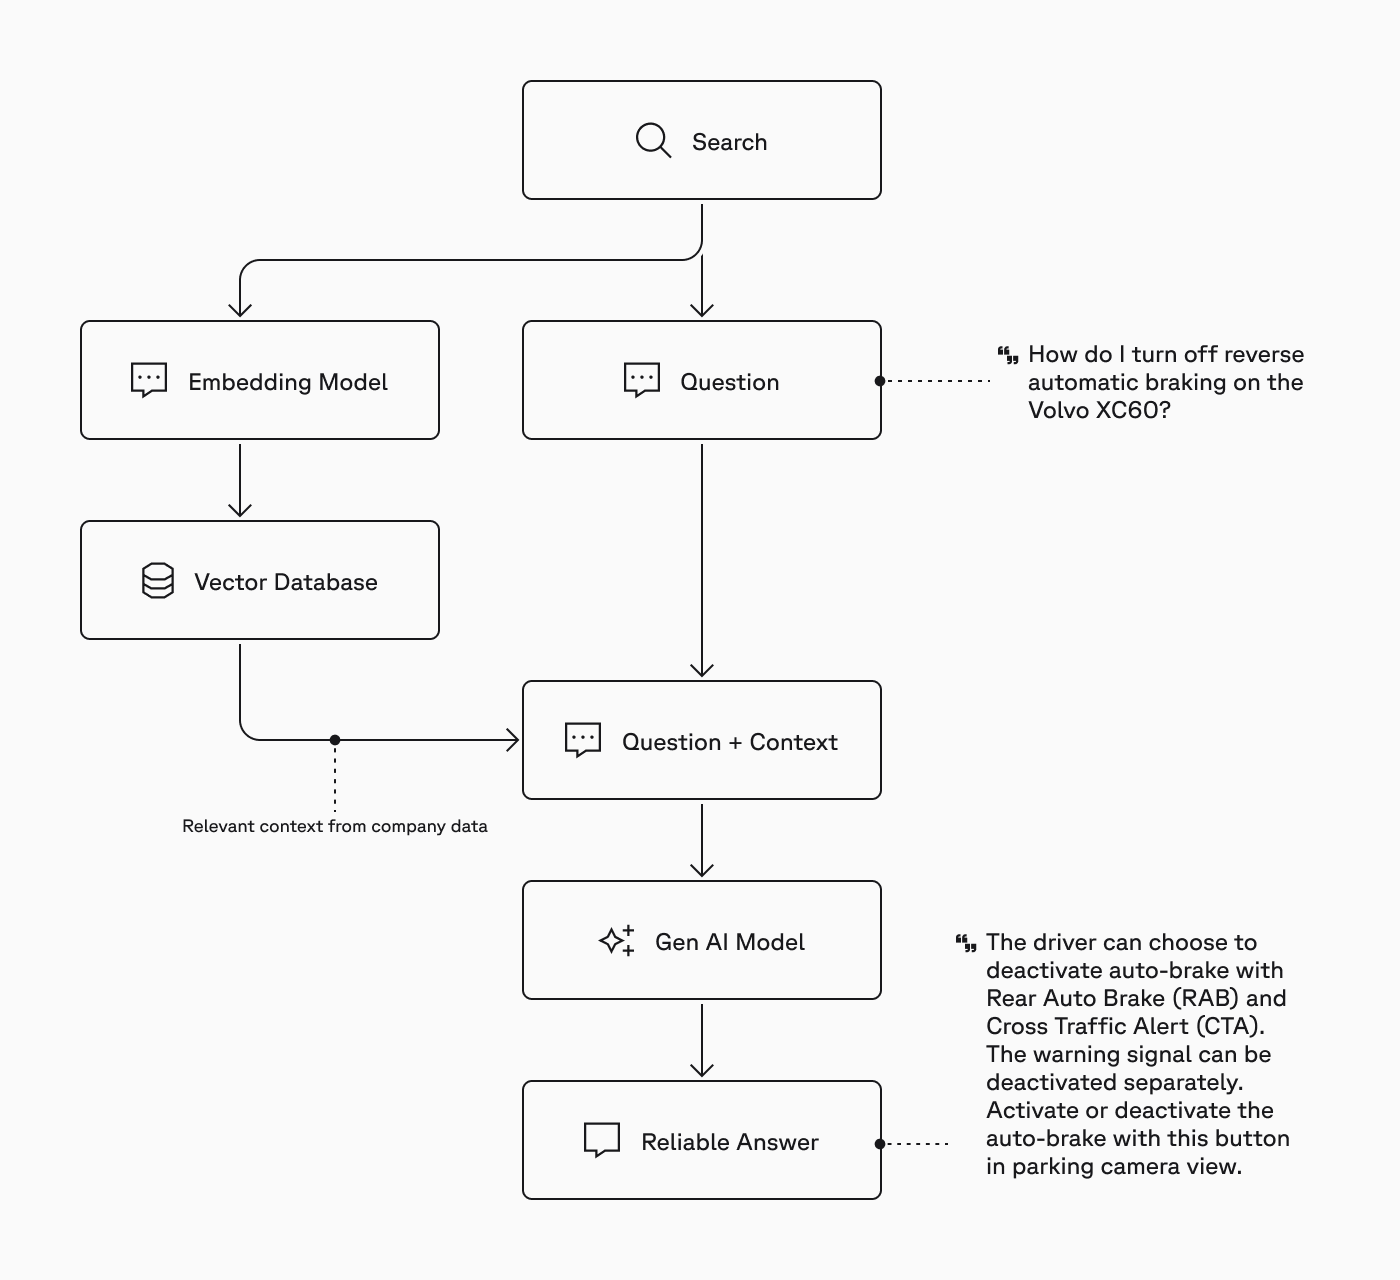

#### Prerequisites

Before we start building our chatbot, we need to install some Python libraries. Here's a brief overview of what each library does:

- **langchain**: This is a library for GenAI. We'll use it to chain together different language models and components for our chatbot.
- **openai**: This is the official OpenAI Python client. We'll use it to interact with the OpenAI API and generate responses for our chatbot.
- **datasets**: This library provides a vast array of datasets for machine learning. We'll use it to load our knowledge base for the chatbot.
- **pinecone-client**: This is the official Pinecone Python client. We'll use it to interact with the Pinecone API and store our chatbot's knowledge base in a vector database.

You can install these libraries using pip like so:

In [51]:
!pip install -qU \
    pinecone-client \
    tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 13.2 MB/s eta 0:00:00


#### Building a Chatbot (no RAG)

We will be relying heavily on the LangChain library to bring together the different components needed for our chatbot. To begin, we'll create a simple chatbot without any retrieval augmentation. We do this by initializing a `ChatOpenAI` object.

Chats with OpenAI's `gpt-3.5-turbo` and `gpt-4` chat models are typically structured (in plain text) like this:

```
System: You are a helpful assistant.

User: Hi AI, how are you today?

Assistant: I'm great thank you. How can I help you?

User: I'd like to understand string theory.

Assistant:
```

The final `"Assistant:"` without a response is what would prompt the model to continue the conversation. In the official OpenAI `ChatCompletion` endpoint these would be passed to the model in a format like:

```python
[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hi AI, how are you today?"},
    {"role": "assistant", "content": "I'm great thank you. How can I help you?"}
    {"role": "user", "content": "I'd like to understand string theory."}
]
```

In LangChain there is a slightly different format. We use three _message_ objects like so:

In [52]:
from langchain.schema import (
    SystemMessage,
    HumanMessage,
    AIMessage
)

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Hi AI, how are you today?"),
    AIMessage(content="I'm great thank you. How can I help you?"),
    HumanMessage(content="I'd like to understand string theory.")
]

The format is very similar, we're just swapped the role of `"user"` for `HumanMessage`, and the role of `"assistant"` for `AIMessage`.

We generate the next response from the AI by passing these messages to the `ChatOpenAI` object.

In [53]:
res = chat_model(messages)
res

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


AIMessage(content=' String theory is a theoretical framework in which the point-like particles of particle physics are replaced by one-dimensional objects known as strings. It describes how these strings propagate through space and interact with each other. Here are some key points about string theory:\n\n1. **Fundamental Objects**: In string theory, the fundamental constituents of matter are not zero-dimensional points (as in particle physics) but rather tiny strings that vibrate at specific frequencies. Each type of string corresponds to a different particle.\n\n2. **Unified Theory**: One of the main goals of string theory is to provide a unified description of all forces and forms of matter. The hope is that it could eventually lead to a "Theory of Everything," merging general relativity (which describes gravity) with quantum mechanics.\n\n3. **Extra Dimensions**: String theory requires more than the four dimensions we experience (three spatial dimensions plus time). Most versions o

In response we get another AI message object. We can print it more clearly like so:

In [54]:
print(res.content)

 String theory is a theoretical framework in which the point-like particles of particle physics are replaced by one-dimensional objects known as strings. It describes how these strings propagate through space and interact with each other. Here are some key points about string theory:

1. **Fundamental Objects**: In string theory, the fundamental constituents of matter are not zero-dimensional points (as in particle physics) but rather tiny strings that vibrate at specific frequencies. Each type of string corresponds to a different particle.

2. **Unified Theory**: One of the main goals of string theory is to provide a unified description of all forces and forms of matter. The hope is that it could eventually lead to a "Theory of Everything," merging general relativity (which describes gravity) with quantum mechanics.

3. **Extra Dimensions**: String theory requires more than the four dimensions we experience (three spatial dimensions plus time). Most versions of string theory suggest t

Because `res` is just another `AIMessage` object, we can append it to `messages`, add another `HumanMessage`, and generate the next response in the conversation.

In [55]:
# add latest AI response to messages
messages.append(res)

# now create a new user prompt
prompt = HumanMessage(
    content="Why do physicists believe it can produce a 'unified theory'?"
)
# add to messages
messages.append(prompt)

# send to chat-gpt
res = chat_model(messages)

print(res.content)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


 Physicists are interested in developing a unified theory because it would reconcile two of the most successful yet currently incompatible theories in modern physics: General Relativity and Quantum Mechanics.

1. **General Relativity**: This is our current understanding of gravitation, describing the large-scale structure of the universe. It explains how mass and energy warp spacetime, creating what we perceive as gravity. However, it does not work well when applied to very small scales or extremely high speeds.

2. **Quantum Mechanics**: On the other hand, Quantum Mechanics governs the behavior of particles at the smallest scales. It has been incredibly successful in explaining phenomena at the atomic and subatomic levels. But it doesn't account for gravity, leading to inconsistencies when trying to describe systems where both quantum effects and gravitational forces are significant.

3. **Incompatibility**: The two theories use fundamentally different mathematical frameworks and conc

#### Dealing with Hallucinations

We have our chatbot, but as mentioned — the knowledge of LLMs can be limited. The reason for this is that LLMs learn all they know during training. An LLM essentially compresses the "world" as seen in the training data into the internal parameters of the model. We call this knowledge the _parametric knowledge_ of the model.

By default, LLMs have no access to the external world.

The result of this is very clear when we ask LLMs about more recent information, like about the new (and very popular) Llama 2 LLM.

In [56]:
# add latest AI response to messages
messages.append(res)

# now create a new user prompt
prompt = HumanMessage(
    content="What is so special about Llama 2?"
)
# add to messages
messages.append(prompt)

# send to chat model
res = chat_model(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [57]:
print(res.content)

 It seems there might be some confusion here. "Llama 2" isn't a widely recognized term in science, technology, or popular culture as of my knowledge cutoff date in early 2023. If you're referring to a specific product, software, game, or any other context, please provide more details so I can give an accurate response.

If "Llama 2" is related to a fictional scenario, a niche hobby, or a recent development that emerged after my last update, I won't have information on it. Please clarify your question, and I'll do my best to assist you!


Our chatbot can no longer help us, it doesn't contain the information we need to answer the question. It was very clear from this answer that the LLM doesn't know the informaiton, but sometimes an LLM may respond like it _does_ know the answer — and this can be very hard to detect.

OpenAI have since adjusted the behavior for this particular example as we can see below:

In [58]:
# add latest AI response to messages
messages.append(res)

# now create a new user prompt
prompt = HumanMessage(
    content="Can you tell me about the LLMChain in LangChain?"
)
# add to messages
messages.append(prompt)

# send to chat model
res = chat_model(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [59]:
print(res.content)

 As of my last update, there is no widely recognized entity named "LLMChain" specifically associated with "LangChain." However, based on the components of your question, I can provide some insights that may align with what you're asking about:

1. **LLM**: This acronym typically stands for "Large Language Model," which refers to sophisticated artificial intelligence models designed to understand and generate human language. Examples include GPT (Generative Pre-trained Transformer) developed by Microsoft or BERT (Bidirectional Encoder Representations from Transformers) developed by Google.

2. **Chain**: In the context of programming or computer science, a chain usually refers to a sequence or linked list data structure where elements are connected one after another.

3. **LangChain**: Without further context, it's challenging to pinpoint exactly what "LangChain" refers to. It could be a project, library, or tool related to natural language processing (NLP) and language models.

Assumin

There is another way of feeding knowledge into LLMs. It is called _source knowledge_ and it refers to any information fed into the LLM via the prompt. We can try that with the LLMChain question. We can take a description of this object from the LangChain documentation.

In [60]:
llmchain_information = [
    "A LLMChain is the most common type of chain. It consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser. This chain takes multiple input variables, uses the PromptTemplate to format them into a prompt. It then passes that to the model. Finally, it uses the OutputParser (if provided) to parse the output of the LLM into a final format.",
    "Chains is an incredibly generic concept which returns to a sequence of modular components (or other chains) combined in a particular way to accomplish a common use case.",
    "LangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model via an api, but will also: (1) Be data-aware: connect a language model to other sources of data, (2) Be agentic: Allow a language model to interact with its environment. As such, the LangChain framework is designed with the objective in mind to enable those types of applications."
]

source_knowledge = "\n".join(llmchain_information)

We can feed this additional knowledge into our prompt with some instructions telling the LLM how we'd like it to use this information alongside our original query.

In [61]:
query = "Can you tell me about the LLMChain in LangChain?"

augmented_prompt = f"""Using the contexts below, answer the query.

Contexts:
{source_knowledge}

Query: {query}"""

Now we feed this into our chatbot as we were before.

In [62]:
# create a new user prompt
prompt = HumanMessage(
    content=augmented_prompt
)
# add to messages
messages.append(prompt)

# send to chat model
res = chat_model(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [63]:
print(res.content)

 The LLMChain in LangChain refers to a structured component within the LangChain framework, specifically tailored for building soph0me applications that leverage language models. Here's a detailed breakdown based on the given contexts:

1. **Structure**: An LLMChain is composed of three primary elements:
   - **PromptTemplate**: This part of the chain is responsible for formatting input variables into a coherent prompt that can be understood by the language model. It acts as a template that dictates how inputs should be presented to the model.
   - **Model**: At the heart of the LLMChain is the language model itself, which could be either a Large Language Model (LLM) or a ChatModel. This model processes the formatted prompt and generates responses based on its training.
   - **OutputParser (optional)**: Not every LLMChain may require an output parser, but if included, this component interprets the raw output from the language model and converts it into a desired final format.

2. **Fun

The quality of this answer is phenomenal. This is made possible thanks to the idea of augmented our query with external knowledge (source knowledge). There's just one problem — how do we get this information in the first place?

We learned in the previous chapters about Pinecone and vector databases. Well, they can help us here too. But first, we'll need a dataset.

#### Importing the Data to Pinecone

In this task, we will be importing our data. We will be using the Hugging Face Datasets library to load our data. Specifically, we will be using the `"jamescalam/llama-2-arxiv-papers"` dataset. This dataset contains a collection of ArXiv papers which will serve as the external knowledge base for our chatbot.

In [64]:
from datasets import load_dataset

dataset = load_dataset(
    "jamescalam/llama-2-arxiv-papers-chunked",
    split="train"
)

dataset

Generating train split:   0%|          | 0/4838 [00:00<?, ? examples/s]

Dataset({
    features: ['doi', 'chunk-id', 'chunk', 'id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'references'],
    num_rows: 4838
})

In [65]:
dataset[0]

{'doi': '1102.0183',
 'chunk-id': '0',
 'chunk': 'High-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nTechnical Report No. IDSIA-01-11\nJanuary 2011\nIDSIA / USI-SUPSI\nDalle Molle Institute for Arti\x0ccial Intelligence\nGalleria 2, 6928 Manno, Switzerland\nIDSIA is a joint institute of both University of Lugano (USI) and University of Applied Sciences of Southern Switzerland (SUPSI),\nand was founded in 1988 by the Dalle Molle Foundation which promoted quality of life.\nThis work was partially supported by the Swiss Commission for Technology and Innovation (CTI), Project n. 9688.1 IFF:\nIntelligent Fill in Form.arXiv:1102.0183v1  [cs.AI]  1 Feb 2011\nTechnical Report No. IDSIA-01-11 1\nHigh-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nJanuary 2011\nAbs

#### Dataset Overview

The dataset we are using is sourced from the Llama 2 ArXiv papers. It is a collection of academic papers from ArXiv, a repository of electronic preprints approved for publication after moderation. Each entry in the dataset represents a "chunk" of text from these papers.

Because most **L**arge **L**anguage **M**odels (LLMs) only contain knowledge of the world as it was during training, they cannot answer our questions about Llama 2 — at least not without this data.

#### Pinecone setup

We now have a dataset that can serve as our chatbot knowledge base. Our next task is to transform that dataset into the knowledge base that our chatbot can use. To do this we must use an embedding model and vector database.

We begin by initializing our connection to Pinecone, this requires a [free API key](https://app.pinecone.io).

In [66]:
#enter api key in command line
import getpass
import os
PINECONE_API_KEY = getpass.getpass()

··········


In [67]:
from pinecone import Pinecone

# initialize connection to pinecone (get API key at app.pinecone.io)
api_key = os.getenv("PINECONE_API_KEY") or PINECONE_API_KEY

# configure client
pc = Pinecone(api_key=api_key)

Now we setup our index specification, this allows us to define the cloud provider and region where we want to deploy our index. You can find a list of all [available providers and regions here](https://docs.pinecone.io/docs/projects).

In [68]:
from pinecone import ServerlessSpec

spec = ServerlessSpec(
    cloud="aws", region="us-east-1"
)

In [71]:
#enter api key in command line
import getpass
import os
if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### Embedding Models

In [72]:
#option1, use OpenAIEmbeddings
from langchain.embeddings.openai import OpenAIEmbeddings

embed_model = OpenAIEmbeddings(model="text-embedding-ada-002")

In [74]:
#option2, use Huggingface embeddings for local processing
from langchain_community.embeddings import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': False}
hf_embed_model = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

<ipython-input-74-9fb917fd6d91>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  hf_embed_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Using this model we can create embeddings like so:

In [75]:
texts = [
    'this is the first chunk of text',
    'then another second chunk of text is here'
]

res = hf_embed_model.embed_documents(texts)
len(res), len(res[0])

(2, 768)

In [82]:
embedding_size = len(res[0])

From this we get two (aligning to our two chunks of text) 768-dimensional embeddings.

#### Create Pinecone Index

Then we initialize the index. If we are using OpenAI's `text-embedding-ada-002` model for creating the embeddings, we set the `dimension` to `1536`. If we are using Huggingface sentence-transformers/all-mpnet-base-v2, set the `dimension` to `768`

Our index is now ready but it's empty. It is a vector index, so it needs vectors. We will create these vector embeddings via embedding model

In [83]:
import time

index_name = 'hf-rag'
existing_indexes = [
    index_info["name"] for index_info in pc.list_indexes()
]

# check if index already exists (it shouldn't if this is first time)
if index_name not in existing_indexes:
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=embedding_size,  # dimensionality of embedding model
        metric='dotproduct',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
index.describe_index_stats()

{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

We're now ready to embed and index all our our data! We do this by looping through our dataset and embedding and inserting everything in batches.

In [84]:
from tqdm.auto import tqdm  # for progress bar

data = dataset.to_pandas()  # this makes it easier to iterate over the dataset

batch_size = 100

for i in tqdm(range(0, len(data), batch_size)):
    i_end = min(len(data), i+batch_size)
    # get batch of data
    batch = data.iloc[i:i_end]
    # generate unique ids for each chunk
    ids = [f"{x['doi']}-{x['chunk-id']}" for i, x in batch.iterrows()]
    # get text to embed
    texts = [x['chunk'] for _, x in batch.iterrows()]
    # embed text
    embeds = hf_embed_model.embed_documents(texts)
    # get metadata to store in Pinecone
    metadata = [
        {'text': x['chunk'],
         'source': x['source'],
         'title': x['title']} for i, x in batch.iterrows()
    ]
    # add to Pinecone
    index.upsert(vectors=zip(ids, embeds, metadata))

  0%|          | 0/49 [00:00<?, ?it/s]

We can check that the vector index has been populated using `describe_index_stats` like before:

In [85]:
index.describe_index_stats()

{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 4838}},
 'total_vector_count': 4838}

#### Retrieval Augmented Generation

We've built a fully-fledged knowledge base. Now it's time to connect that knowledge base to our chatbot. To do that we'll be diving back into LangChain and reusing our template prompt from earlier.

To use LangChain here we need to load the LangChain abstraction for a vector index, called a `vectorstore`. We pass in our vector `index` to initialize the object.

In [87]:
from langchain.vectorstores import Pinecone

text_field = "text"  # the metadata field that contains our text

# initialize the vector store object
vectorstore = Pinecone(
    index, hf_embed_model.embed_query, text_field
)

<ipython-input-87-32ae633d1b4e>:6: LangChainDeprecationWarning: The class `Pinecone` was deprecated in LangChain 0.0.18 and will be removed in 1.0. An updated version of the class exists in the langchain-pinecone package and should be used instead. To use it run `pip install -U langchain-pinecone` and import as `from langchain_pinecone import Pinecone`.
  vectorstore = Pinecone(
/usr/local/lib/python3.10/dist-packages/langchain_community/vectorstores/pinecone.py:68: UserWarning: Passing in `embedding` as a Callable is deprecated. Please pass in an Embeddings object instead.
  warnings.warn(


Using this `vectorstore` we can already query the index and see if we have any relevant information given our question about Llama 2.

In [88]:
query = "What is so special about Llama 2?"

vectorstore.similarity_search(query, k=3)

[Document(metadata={'source': 'http://arxiv.org/pdf/2307.09288', 'title': 'Llama 2: Open Foundation and Fine-Tuned Chat Models'}, page_content='our responsible release strategy can be found in Section 5.3.\nTheremainderofthispaperdescribesourpretrainingmethodology(Section2),ﬁne-tuningmethodology\n(Section 3), approach to model safety (Section 4), key observations and insights (Section 5), relevant related\nwork (Section 6), and conclusions (Section 7).\n‡https://ai.meta.com/resources/models-and-libraries/llama/\n§We are delaying the release of the 34B model due to a lack of time to suﬃciently red team.\n¶https://ai.meta.com/llama\n‖https://github.com/facebookresearch/llama\n4\nFigure 4: Training of L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc : This process begins with the pretraining ofL/l.sc/a.sc/m.sc/a.sc /two.taboldstyle using publicly\navailableonlinesources. Followingthis,wecreateaninitialversionof L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc throughtheappli

We return a lot of text here and it's not that clear what we need or what is relevant. Fortunately, our LLM will be able to parse this information much faster than us. All we need is to connect the output from our `vectorstore` to our `chat` chatbot. To do that we can use the same logic as we used earlier.

In [89]:
def augment_prompt(query: str):
    # get top 3 results from knowledge base
    results = vectorstore.similarity_search(query, k=3)
    # get the text from the results
    source_knowledge = "\n".join([x.page_content for x in results])
    # feed into an augmented prompt
    augmented_prompt = f"""Using the contexts below, answer the query.

    Contexts:
    {source_knowledge}

    Query: {query}"""
    return augmented_prompt

Using this we produce an augmented prompt:

In [90]:
print(augment_prompt(query))

Using the contexts below, answer the query.

    Contexts:
    our responsible release strategy can be found in Section 5.3.
Theremainderofthispaperdescribesourpretrainingmethodology(Section2),ﬁne-tuningmethodology
(Section 3), approach to model safety (Section 4), key observations and insights (Section 5), relevant related
work (Section 6), and conclusions (Section 7).
‡https://ai.meta.com/resources/models-and-libraries/llama/
§We are delaying the release of the 34B model due to a lack of time to suﬃciently red team.
¶https://ai.meta.com/llama
‖https://github.com/facebookresearch/llama
4
Figure 4: Training of L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc : This process begins with the pretraining ofL/l.sc/a.sc/m.sc/a.sc /two.taboldstyle using publicly
availableonlinesources. Followingthis,wecreateaninitialversionof L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc throughtheapplication
Ricardo Lopez-Barquilla, Marc Shedroﬀ, Kelly Michelena, Allie Feinstein, Amit Sangan

There is still a lot of text here, so let's pass it onto our chat model to see how it performs.

In [91]:
chat_model

ChatHuggingFace(llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f8bea059660>, model_id='microsoft/Phi-3.5-mini-instruct', model_kwargs={'quantization_config': BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "float16",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant": true,
  "llm_int8_enable_fp32_cpu_offload": false,
  "llm_int8_has_fp16_weight": false,
  "llm_int8_skip_modules": null,
  "llm_int8_threshold": 6.0,
  "load_in_4bit": true,
  "load_in_8bit": false,
  "quant_method": "bitsandbytes"
}
}, pipeline_kwargs={'max_new_tokens': 500, 'do_sample': False, 'temperature': 0.0, 'return_full_text': False, 'repetition_penalty': 1.03}), tokenizer=LlamaTokenizerFast(name_or_path='microsoft/Phi-3.5-mini-instruct', vocab_size=32000, model_max_length=131072, is_fast=True, padding_side='left', truncation_side='right', special_tokens=

In [92]:
# create a new user prompt
prompt = HumanMessage(
    content=augment_prompt(query)
)
# add to messages
messages.append(prompt)

res = chat_model(messages)

print(res.content)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


 Based on the provided contexts, it appears that "Llama 2" refers to a later iteration or version of the Llama language model series, possibly developed by Facebook's AI research group. Here are some key points extracted from the contexts that highlight the significance of Llama 2:

1. **Advanced Preparation**: The training process for Llama 2 starts with pretraining using publicly available online sources, indicating a robust foundation built upon existing knowledge.

2. **Initial Version Creation**: After pretraining, an initial version of Llama 2 was created, suggesting iterative improvements and refinements were made based on the pretrained model.

3. **Community Engagement**: The involvement of various contributors, including members of the original Llama team and external reviewers, shows a collaborative effort to enhance the model's quality and functionality.

4. **Computational Efficiency**: Recognition for the focus on computational efficiency during inference indicates that L

We can continue with more Llama 2 questions. Let's try _without_ RAG first:

In [93]:
prompt = HumanMessage(
    content="what safety measures were used in the development of llama 2?"
)

res = chat_model(messages + [prompt])
print(res.content)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


 Based on the provided contexts, while there is no explicit mention of "Llama 2," we can infer that the development of language models like Llama likely includes considerations for safety measures, especially given the importance of model safety highlighted in Section 4 of the paper. Here are some possible safety measures that could be associated with the development of such models, based on standard practices in the field:

1. **Data Sourcing and Quality Control**: Ensuring that the training data is reliable, diverse, and free from biases that could affect the model's outputs adversely.

2. **Robustness Testing**: Conducting thorough testing against adversarial inputs to ensure the model behaves reliably even when faced with attempts to exploit potential vulnerabilities.

3. **Transparency and Explainability**: Implementing methods to make the model's decision-making processes more transparent and explainable, which helps users trust and effectively manage the model.

4. **Ethical Con

The chatbot is able to respond about Llama 2 thanks to it's conversational history stored in `messages`. However, it doesn't know anything about the safety measures themselves as we have not provided it with that information via the RAG pipeline. Let's try again but with RAG.

In [94]:
prompt = HumanMessage(
    content=augment_prompt(
        "what safety measures were used in the development of llama 2?"
    )
)

res = chat_model(messages + [prompt])
print(res.content)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


 In the development of Llama 2, several safety measures were implemented to ensure responsible use and mitigate potential risks associated with deploying large language models (LLMs). Based on the provided contexts, the following safety measures were utilized:

1. Safety-specific Data Annotation: The developers annotated training data with safety considerations to guide the model towards safer outputs.

2. Safety Tuning: They employed fine-tuning methodologies specifically designed to enhance the safety aspect of the model. This likely involved adjusting the model's parameters to reduce the likelihood of generating harmful or misleading content.

3. Red-teaming: Conducting red-teaming exerlaces was part of the process. Red-teaming typically involves simulating adversarial attacks or scenarios to identify vulnerabilities in the model before deployment.

4. Iterative Evaluations: The model underwent iterative evaluations to continuously assess and improve its safety features. This implie

We get a much more informed response that includes several items missing in the previous non-RAG response, such as "red-teaming", "iterative evaluations", and the intention of the researchers to share this research to help "improve their safety, promoting responsible development in the field".

Delete the index to save resources:

In [95]:
pc.delete_index(index_name)

---

### Pinecone Semantic Search

#### Download the Quora dataset from Hugging Face Datasets

In [96]:
from datasets import load_dataset

dataset = load_dataset('quora', split='train[240000:260000]')
dataset

The repository for quora contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/quora.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/404290 [00:00<?, ? examples/s]

Dataset({
    features: ['questions', 'is_duplicate'],
    num_rows: 20000
})

The dataset contains pairs of natural language questions from Quora. Check the dataset:

In [97]:
dataset[:5]

{'questions': [{'id': [207550, 351729],
   'text': ['What is the truth of life?', "What's the evil truth of life?"]},
  {'id': [33183, 351730],
   'text': ['Which is the best smartphone under 20K in India?',
    'Which is the best smartphone with in 20k in India?']},
  {'id': [351731, 351732],
   'text': ['Steps taken by Canadian government to improve literacy rate?',
    'Can I send homemade herbal hair oil from India to US via postal or private courier services?']},
  {'id': [37799, 94186],
   'text': ['What is a good way to lose 30 pounds in 2 months?',
    'What can I do to lose 30 pounds in 2 months?']},
  {'id': [351733, 351734],
   'text': ['Which of the following most accurately describes the translation of the graph y = (x+3)^2 -2 to the graph of y = (x -2)^2 +2?',
    'How do you graph x + 2y = -2?']}],
 'is_duplicate': [False, True, False, True, False]}

All we need for this example is the text itself. We can extract them all into a single questions list.

In [98]:
questions = []

for record in dataset['questions']:
    questions.extend(record['text'])

# remove duplicates
questions = list(set(questions))
print('\n'.join(questions[:5]))
print(len(questions))

How does a charcoal suit pink waistcoat and blue shirt look for graduation?
What is the best ePub reader for the Mac?
What are some good books on ancient Indian history?
Why don't antidepressants work for everyone?
Which is the best sunscreen brand in India?
37754


In [99]:
questions[100]

'When can we expect the xiaomi laptop launch in India?'

#### Build Embeddings

To create our embeddings we will us the `MiniLM-L6` sentence transformer model. This is a very efficient semantic similarity embedding model from the `sentence-transformers` library.

In [100]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device != 'cuda':
    print(f"You are using {device}. This is much slower than using "
          "a CUDA-enabled GPU. If on Colab you can change this by "
          "clicking Runtime > Change runtime type > GPU.")

model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [102]:
model.get_sentence_embedding_dimension()

384

There are *three* interesting bits of information in the above model printout. Those are:

* `max_seq_length` is `256`. That means that the maximum number of tokens (like words) that can be encoded into a single vector embedding is `256`. Anything beyond this *must* be truncated.

* `word_embedding_dimension` is `384`. This number is the dimensionality of vectors output by this model. It is important that we know this number later when initializing our Pinecone vector index.

* `Normalize()`. This final normalization step indicates that all vectors produced by the model are normalized. That means that models that we would typical measure similarity for using *cosine similarity* can also make use of the *dotproduct* similarity metric. In fact, with normalized vectors *cosine* and *dotproduct* are equivalent.

Moving on, we can create a sentence embedding using this model like so:

In [104]:
questions[100]

'When can we expect the xiaomi laptop launch in India?'

In [105]:
query = questions[100]

xq = model.encode(query)
xq.shape

(384,)

Encoding this single sentence leaves us with a `384` dimensional sentence embedding (aligned to the `word_embedding_dimension` above).

To prepare this for `upsert` to Pinecone, all we do is this:

In [106]:
_id = '0'
metadata = {'text': query}

vectors = [(_id, xq, metadata)]

Later when we do upsert our data to Pinecone, we will be doing so in batches. Meaning `vectors` will be a list of `(id, embedding, metadata)` tuples.

#### Create Pinecone Index

In [107]:
import os
from pinecone import Pinecone

# initialize connection to pinecone (get API key at app.pinecone.io)
api_key = os.environ.get('PINECONE_API_KEY') or PINECONE_API_KEY

# configure client
pc = Pinecone(api_key=api_key)

Now we setup our index specification, this allows us to define the cloud provider and region where we want to deploy our index. You can find a list of all [available providers and regions here](https://docs.pinecone.io/docs/projects).

In [108]:
from pinecone import ServerlessSpec

cloud = os.environ.get('PINECONE_CLOUD') or 'aws'
region = os.environ.get('PINECONE_REGION') or 'us-east-1'

spec = ServerlessSpec(cloud=cloud, region=region)

Now we create a new index called `semantic-search`. It's important that we align the index `dimension` and `metric` parameters with those required by the `MiniLM-L6` model.

In [109]:
index_name = 'semantic-search'

In [110]:
import time

# check if index already exists (it shouldn't if this is first time)
if index_name not in pc.list_indexes().names():
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=model.get_sentence_embedding_dimension(),
        metric='cosine',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
# view index stats
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 37754}},
 'total_vector_count': 37754}

Now we upsert the data, we will do this in batches of 128.

In [111]:
from tqdm.auto import tqdm

batch_size = 128
vector_limit = 100000

questions = questions[:vector_limit]

for i in tqdm(range(0, len(questions), batch_size)):
    # find end of batch
    i_end = min(i+batch_size, len(questions))
    # create IDs batch
    ids = [str(x) for x in range(i, i_end)]
    # create metadata batch
    metadatas = [{'text': text} for text in questions[i:i_end]]
    # create embeddings
    xc = model.encode(questions[i:i_end])
    # create records list for upsert
    records = zip(ids, xc, metadatas)
    # upsert to Pinecone
    index.upsert(vectors=records)

# check number of records in the index
index.describe_index_stats()

  0%|          | 0/295 [00:00<?, ?it/s]

{'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 37754}},
 'total_vector_count': 37754}

#### Making Queries

Now that our index is populated we can begin making queries. We are performing a semantic search for *similar questions*, so we should embed and search with another question. Let's begin.

In [112]:
questions[100]

'When can we expect the xiaomi laptop launch in India?'

In [116]:
query = questions[100]

# create the query vector
xq = model.encode(query).tolist()

# now query
xc = index.query(vector=xq, top_k=5, include_metadata=True)
xc

{'matches': [{'id': '100',
              'metadata': {'text': 'When can we expect the xiaomi laptop '
                                   'launch in India?'},
              'score': 1.00012648,
              'values': []},
             {'id': '11318',
              'metadata': {'text': 'When can we expect the xiaomi laptop '
                                   'launch date in India?'},
              'score': 0.977605641,
              'values': []},
             {'id': '36306',
              'metadata': {'text': 'When will be the Xiaomi Redmi Pro is '
                                   'releasing in India?'},
              'score': 0.805348337,
              'values': []},
             {'id': '2544',
              'metadata': {'text': 'When will MIUI 8 for Xiaomi Redmi Note 3 '
                                   'release in India?'},
              'score': 0.700729787,
              'values': []},
             {'id': '14763',
              'metadata': {'text': 'When will be Pokemon go re

In the returned response `xc` we can see the most relevant questions to our particular query. We can reformat this response to be a little easier to read:

In [114]:
for result in xc['matches']:
    print(f"{round(result['score'], 2)}: {result['metadata']['text']}")

1.0: When can we expect the xiaomi laptop launch in India?
0.98: When can we expect the xiaomi laptop launch date in India?
0.81: When will be the Xiaomi Redmi Pro is releasing in India?
0.7: When will MIUI 8 for Xiaomi Redmi Note 3 release in India?
0.65: When will be Pokemon go released in India?


modify the words being used to see if we still surface similar results.

In [117]:
query = "Will xiaomi laptop launch in India?"

# create the query vector
xq = model.encode(query).tolist()

# now query
xc = index.query(vector=xq, top_k=5, include_metadata=True)
for result in xc['matches']:
    print(f"{round(result['score'], 2)}: {result['metadata']['text']}")

0.92: When can we expect the xiaomi laptop launch in India?
0.88: When can we expect the xiaomi laptop launch date in India?
0.73: When will be the Xiaomi Redmi Pro is releasing in India?
0.64: Which is the best laptop in India?
0.64: When will MIUI 8 for Xiaomi Redmi Note 3 release in India?


When you're done, delete the index to save resources:

In [118]:
pc.delete_index(index_name)

### LangChain RAG Chatbot with uploaded documents

This example shows you how to build a simple RAG chatbot in Python using Pinecone for the vector database and embedding model, [OpenAI](https://docs.pinecone.io/integrations/openai) for the LLM, and [LangChain](https://docs.pinecone.io/integrations/langchain) for the RAG workflow.

In [ ]:
import getpass
import os
PINECONE_API_KEY = getpass.getpass() #os.environ["PINECONE_API_KEY"]

··········


In [ ]:
# Set your Pinecone API key (replace with your actual key)
os.environ["PINECONE_API_KEY"] = PINECONE_API_KEY

In [ ]:
import getpass
import os
OPENAI_API_KEY = getpass.getpass() #os.environ["PINECONE_API_KEY"]

··········


#### Store knowledge in Pinecone

You'll use a document about a fictional product called the WonderVector5000 that LLMs do not have any information about. You'll use LangChain to chunk the document into smaller segments, convert each segment into vectors using, and then upsert your vectors into your Pinecone index.


<details>
  <summary>Browse the document</summary>

```
# The WonderVector5000: A Journey into Absurd Innovation

## Introduction

Welcome to the whimsical world of the WonderVector5000, an astonishing leap into the realms of imaginative technology. This extraordinary device, borne of creative fancy, promises to revolutionize absolutely nothing while dazzling you with its fantastical features. Whether you're a seasoned technophile or just someone looking for a bit of fun, the WonderVector5000 is sure to leave you amused and bemused in equal measure. Let’s explore the incredible, albeit entirely fictitious, specifications, setup process, and troubleshooting tips for this marvel of modern nonsense.

## Product overview

The WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:

- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on principles of quantum flibberflabber, a phenomenon as mysterious as it is meaningless. It's said to harness the power of improbability to function seamlessly across multiple dimensions.

- Hyperbolic Singularity Matrix: This component compresses infinite possibilities into a singular hyperbolic state, allowing the device to predict outcomes with 0% accuracy, ensuring every use is a new adventure.

- Aetherial Flux Capacitor: Drawing energy from the fictional aether, this flux capacitor provides unlimited power by tapping into the boundless reserves of imaginary energy fields.

- Multi-Dimensional Holo-Interface: Interact with the WonderVector5000 through its holographic interface that projects controls and information in three-and-a-half dimensions, creating a user experience that's simultaneously futuristic and perplexing.

- Neural Fandango Synchronizer: This advanced feature connects directly to the user's brain waves, converting your deepest thoughts into tangible actions—albeit with results that are whimsically unpredictable.

- Chrono-Distortion Field: Manipulate time itself with the WonderVector5000's chrono-distortion field, allowing you to experience moments before they occur or revisit them in a state of temporal flux.

## Use cases

While the WonderVector5000 is fundamentally a device of fiction and fun, let's imagine some scenarios where it could hypothetically be applied:

- Time Travel Adventures: Use the Chrono-Distortion Field to visit key moments in history or glimpse into the future. While actual temporal manipulation is impossible, the mere idea sparks endless storytelling possibilities.

- Interdimensional Gaming: Engage with the Multi-Dimensional Holo-Interface for immersive, out-of-this-world gaming experiences. Imagine games that adapt to your thoughts via the Neural Fandango Synchronizer, creating a unique and ever-changing environment.

- Infinite Creativity: Harness the Hyperbolic Singularity Matrix for brainstorming sessions. By compressing infinite possibilities into hyperbolic states, it could theoretically help unlock unprecedented creative ideas.

- Energy Experiments: Explore the concept of limitless power with the Aetherial Flux Capacitor. Though purely fictional, the notion of drawing energy from the aether could inspire innovative thinking in energy research.

## Getting started

Setting up your WonderVector5000 is both simple and absurdly intricate. Follow these steps to unleash the full potential of your new device:

1. Unpack the Device: Remove the WonderVector5000 from its anti-gravitational packaging, ensuring to handle with care to avoid disturbing the delicate balance of its components.

2. Initiate the Quantum Flibberflabber Engine: Locate the translucent lever marked “QFE Start” and pull it gently. You should notice a slight shimmer in the air as the engine engages, indicating that quantum flibberflabber is in effect.

3. Calibrate the Hyperbolic Singularity Matrix: Turn the dials labeled "Infinity A" and "Infinity B" until the matrix stabilizes. You’ll know it's calibrated correctly when the display shows a single, stable “∞”.

4. Engage the Aetherial Flux Capacitor: Insert the EtherKey into the designated slot and turn it clockwise. A faint humming sound should confirm that the aetherial flux capacitor is active.

5. Activate the Multi-Dimensional Holo-Interface: Press the button resembling a floating question mark to activate the holo-interface. The controls should materialize before your eyes, slightly out of phase with reality.

6. Synchronize the Neural Fandango Synchronizer: Place the neural headband on your forehead and think of the word “Wonder”. The device will sync with your thoughts, a process that should take just a few moments.

7. Set the Chrono-Distortion Field: Use the temporal sliders to adjust the time settings. Recommended presets include “Past”, “Present”, and “Future”, though feel free to explore other, more abstract temporal states.

## Troubleshooting

Even a device as fantastically designed as the WonderVector5000 can encounter problems. Here are some common issues and their solutions:

- Issue: The Quantum Flibberflabber Engine won't start.

    - Solution: Ensure the anti-gravitational packaging has been completely removed. Check for any residual shards of improbability that might be obstructing the engine.

- Issue: The Hyperbolic Singularity Matrix displays “∞∞”.

    - Solution: This indicates a hyper-infinite loop. Reset the dials to zero and then adjust them slowly until the display shows a single, stable infinity symbol.

- Issue: The Aetherial Flux Capacitor isn't engaging.

    - Solution: Verify that the EtherKey is properly inserted and genuine. Counterfeit EtherKeys can often cause malfunctions. Replace with an authenticated EtherKey if necessary.

- Issue: The Multi-Dimensional Holo-Interface shows garbled projections.

    - Solution: Realign the temporal resonators by tapping the holographic screen three times in quick succession. This should stabilize the projections.

- Issue: The Neural Fandango Synchronizer causes headaches.

    - Solution: Ensure the headband is properly positioned and not too tight. Relax and focus on simple, calming thoughts to ease the synchronization process.

- Issue: The Chrono-Distortion Field is stuck in the past.

    - Solution: Increase the temporal flux by 5%. If this fails, perform a hard reset by holding down the “Future” slider for ten seconds.
```

</details

Since your document is in Markdown, [chunk the content](https://www.pinecone.io/learn/chunking-strategies/) based on structure to get semantically coherent segments. In this case, `headers_to_split_on` specifies h2 headers as the indicators of where to split.

In [119]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

markdown_document = "## Introduction\n\nWelcome to the whimsical world of the WonderVector5000, an astonishing leap into the realms of imaginative technology. This extraordinary device, borne of creative fancy, promises to revolutionize absolutely nothing while dazzling you with its fantastical features. Whether you're a seasoned technophile or just someone looking for a bit of fun, the WonderVector5000 is sure to leave you amused and bemused in equal measure. Let's explore the incredible, albeit entirely fictitious, specifications, setup process, and troubleshooting tips for this marvel of modern nonsense.\n\n## Product overview\n\nThe WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:\n\n- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on principles of quantum flibberflabber, a phenomenon as mysterious as it is meaningless. It's said to harness the power of improbability to function seamlessly across multiple dimensions.\n\n- Hyperbolic Singularity Matrix: This component compresses infinite possibilities into a singular hyperbolic state, allowing the device to predict outcomes with 0% accuracy, ensuring every use is a new adventure.\n\n- Aetherial Flux Capacitor: Drawing energy from the fictional aether, this flux capacitor provides unlimited power by tapping into the boundless reserves of imaginary energy fields.\n\n- Multi-Dimensional Holo-Interface: Interact with the WonderVector5000 through its holographic interface that projects controls and information in three-and-a-half dimensions, creating a user experience that's simultaneously futuristic and perplexing.\n\n- Neural Fandango Synchronizer: This advanced feature connects directly to the user's brain waves, converting your deepest thoughts into tangible actions—albeit with results that are whimsically unpredictable.\n\n- Chrono-Distortion Field: Manipulate time itself with the WonderVector5000's chrono-distortion field, allowing you to experience moments before they occur or revisit them in a state of temporal flux.\n\n## Use cases\n\nWhile the WonderVector5000 is fundamentally a device of fiction and fun, let's imagine some scenarios where it could hypothetically be applied:\n\n- Time Travel Adventures: Use the Chrono-Distortion Field to visit key moments in history or glimpse into the future. While actual temporal manipulation is impossible, the mere idea sparks endless storytelling possibilities.\n\n- Interdimensional Gaming: Engage with the Multi-Dimensional Holo-Interface for immersive, out-of-this-world gaming experiences. Imagine games that adapt to your thoughts via the Neural Fandango Synchronizer, creating a unique and ever-changing environment.\n\n- Infinite Creativity: Harness the Hyperbolic Singularity Matrix for brainstorming sessions. By compressing infinite possibilities into hyperbolic states, it could theoretically help unlock unprecedented creative ideas.\n\n- Energy Experiments: Explore the concept of limitless power with the Aetherial Flux Capacitor. Though purely fictional, the notion of drawing energy from the aether could inspire innovative thinking in energy research.\n\n## Getting started\n\nSetting up your WonderVector5000 is both simple and absurdly intricate. Follow these steps to unleash the full potential of your new device:\n\n1. Unpack the Device: Remove the WonderVector5000 from its anti-gravitational packaging, ensuring to handle with care to avoid disturbing the delicate balance of its components.\n\n2. Initiate the Quantum Flibberflabber Engine: Locate the translucent lever marked “QFE Start” and pull it gently. You should notice a slight shimmer in the air as the engine engages, indicating that quantum flibberflabber is in effect.\n\n3. Calibrate the Hyperbolic Singularity Matrix: Turn the dials labeled 'Infinity A' and 'Infinity B' until the matrix stabilizes. You'll know it's calibrated correctly when the display shows a single, stable “∞”.\n\n4. Engage the Aetherial Flux Capacitor: Insert the EtherKey into the designated slot and turn it clockwise. A faint humming sound should confirm that the aetherial flux capacitor is active.\n\n5. Activate the Multi-Dimensional Holo-Interface: Press the button resembling a floating question mark to activate the holo-interface. The controls should materialize before your eyes, slightly out of phase with reality.\n\n6. Synchronize the Neural Fandango Synchronizer: Place the neural headband on your forehead and think of the word “Wonder”. The device will sync with your thoughts, a process that should take just a few moments.\n\n7. Set the Chrono-Distortion Field: Use the temporal sliders to adjust the time settings. Recommended presets include “Past”, “Present”, and “Future”, though feel free to explore other, more abstract temporal states.\n\n## Troubleshooting\n\nEven a device as fantastically designed as the WonderVector5000 can encounter problems. Here are some common issues and their solutions:\n\n- Issue: The Quantum Flibberflabber Engine won't start.\n\n    - Solution: Ensure the anti-gravitational packaging has been completely removed. Check for any residual shards of improbability that might be obstructing the engine.\n\n- Issue: The Hyperbolic Singularity Matrix displays “∞∞”.\n\n    - Solution: This indicates a hyper-infinite loop. Reset the dials to zero and then adjust them slowly until the display shows a single, stable infinity symbol.\n\n- Issue: The Aetherial Flux Capacitor isn't engaging.\n\n    - Solution: Verify that the EtherKey is properly inserted and genuine. Counterfeit EtherKeys can often cause malfunctions. Replace with an authenticated EtherKey if necessary.\n\n- Issue: The Multi-Dimensional Holo-Interface shows garbled projections.\n\n    - Solution: Realign the temporal resonators by tapping the holographic screen three times in quick succession. This should stabilize the projections.\n\n- Issue: The Neural Fandango Synchronizer causes headaches.\n\n    - Solution: Ensure the headband is properly positioned and not too tight. Relax and focus on simple, calming thoughts to ease the synchronization process.\n\n- Issue: The Chrono-Distortion Field is stuck in the past.\n\n    - Solution: Increase the temporal flux by 5%. If this fails, perform a hard reset by holding down the “Future” slider for ten seconds."

headers_to_split_on = [
    ("##", "Header 2")
]

markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, strip_headers=False
)
md_header_splits = markdown_splitter.split_text(markdown_document)

print(md_header_splits)

[Document(metadata={'Header 2': 'Introduction'}, page_content="## Introduction  \nWelcome to the whimsical world of the WonderVector5000, an astonishing leap into the realms of imaginative technology. This extraordinary device, borne of creative fancy, promises to revolutionize absolutely nothing while dazzling you with its fantastical features. Whether you're a seasoned technophile or just someone looking for a bit of fun, the WonderVector5000 is sure to leave you amused and bemused in equal measure. Let's explore the incredible, albeit entirely fictitious, specifications, setup process, and troubleshooting tips for this marvel of modern nonsense."), Document(metadata={'Header 2': 'Product overview'}, page_content="## Product overview  \nThe WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:  \n- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on

You can also upload a txt file

In [131]:
!wget https://raw.githubusercontent.com/hwchase17/langchain/v0.0.200/docs/modules/state_of_the_union.txt

--2024-09-03 04:21:52--  https://raw.githubusercontent.com/hwchase17/langchain/v0.0.200/docs/modules/state_of_the_union.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39027 (38K) [text/plain]
Saving to: ‘state_of_the_union.txt’

state_of_the_union. 100%[===================>]  38.11K  --.-KB/s    in 0.003s  

2024-09-03 04:21:52 (12.1 MB/s) - ‘state_of_the_union.txt’ saved [39027/39027]



In [132]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
# path to an example text file
loader = TextLoader("state_of_the_union.txt")
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs_splits = text_splitter.split_documents(documents)

Initialize a LangChain embedding object. Note that this step uses a Pinecone API key you set as an environment variable earlier.

In [124]:
!pip install langchain_pinecone

In [125]:
from langchain_pinecone import PineconeEmbeddings

model_name = 'multilingual-e5-large'
embeddings = PineconeEmbeddings(
    model=model_name,
    pinecone_api_key=PINECONE_API_KEY #os.environ.get('PINECONE_API_KEY')
)

We initialize a new client instance for Pinecone:

In [120]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=PINECONE_API_KEY)

In [129]:
os.environ['PINECONE_API_KEY'] =PINECONE_API_KEY

Now we setup our index specification, this allows us to define the cloud provider and region where we want to deploy our index.

In [121]:
from pinecone import ServerlessSpec

cloud = os.environ.get('PINECONE_CLOUD') or 'aws'
region = os.environ.get('PINECONE_REGION') or 'us-east-1'

spec = ServerlessSpec(cloud=cloud, region=region)

Define our index name:

In [126]:
index_name = "rag-markdown"

Now create a serverless index in Pinecone for storing the embeddings of your document, setting the index dimensions and distance metric to match those of the Pinecone `multilingual-e5-large` model you'll use to create the embeddings:



In [127]:
import time

if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=embeddings.dimension,
        metric="cosine",
        spec=spec
    )
    # wait for index to be ready
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

Embed and upsert each chunk as a distinct record in a namespace called `wondervector5000`. Namespaces let you partition records within an index and are essential for [implementing multitenancy](https://docs.pinecone.io/guides/indexes/implement-multitenancy) when you need to isolate the data of each customer/user.

https://docs.pinecone.io/integrations/langchain

To initialize a PineconeVectorStore object, you must provide the name of the Pinecone index and an Embeddings object initialized through LangChain. There are two general approaches to initializing a PineconeVectorStore object:



In [130]:
#Initialize without adding records:
from langchain_pinecone import PineconeVectorStore
vectorstore = PineconeVectorStore(index_name=index_name, embedding=embeddings)

The from_documents and from_texts methods of LangChain’s PineconeVectorStore class add records to a Pinecone index and return a PineconeVectorStore object.

The from_documents method accepts a list of LangChain’s Document class objects, which can be created using LangChain’s CharacterTextSplitter class. The from_texts method accepts a list of strings. Similarly to above, you must provide the name of an existing Pinecone index and an Embeddings object.

In [134]:
from langchain_pinecone import PineconeVectorStore

namespace = "wondervector5000"

docsearch = PineconeVectorStore.from_documents(
    documents=md_header_splits,
    index_name=index_name,
    embedding=embeddings,
    namespace=namespace,
)

time.sleep(1)

In [137]:
namespace = "state_of_the_union"
#use the created vectorstore
docsearch = vectorstore.from_documents(
    documents=md_header_splits,
    index_name=index_name,
    embedding=embeddings,
    namespace=namespace,
)

time.sleep(1)

Use Pinecone's `list` and `query` operations to look at one of the records:

In [138]:
index = pc.Index(index_name)
namespace = "wondervector5000"
for ids in index.list(namespace=namespace):
    query = index.query(
        id=ids[0],
        namespace=namespace,
        top_k=1,
        include_values=False,
        include_metadata=True
    )
    print(query)

{'matches': [{'id': '55ad9394-a2a4-44de-a326-5db3cee9720f',
              'metadata': {'Header 2': 'Use cases',
                           'text': '## Use cases  \n'
                                   'While the WonderVector5000 is '
                                   'fundamentally a device of fiction and fun, '
                                   "let's imagine some scenarios where it "
                                   'could hypothetically be applied:  \n'
                                   '- Time Travel Adventures: Use the '
                                   'Chrono-Distortion Field to visit key '
                                   'moments in history or glimpse into the '
                                   'future. While actual temporal manipulation '
                                   'is impossible, the mere idea sparks '
                                   'endless storytelling possibilities.  \n'
                                   '- Interdimensional Gaming: Engage with the 

#### Query

In [139]:
index = pc.Index(index_name)
namespace = "state_of_the_union"
for ids in index.list(namespace=namespace):
    query = index.query(
        id=ids[0],
        namespace=namespace,
        top_k=1,
        include_values=False,
        include_metadata=True
    )
    print(query)

{'matches': [{'id': '002890d8-065e-4f9a-9364-79067dda1b19',
              'metadata': {'Header 2': 'Product overview',
                           'text': '## Product overview  \n'
                                   'The WonderVector5000 is packed with '
                                   'features that defy logic and physics, each '
                                   'designed to sound impressive while '
                                   'maintaining a delightful air of '
                                   'absurdity:  \n'
                                   '- Quantum Flibberflabber Engine: The heart '
                                   'of the WonderVector5000, this engine '
                                   'operates on principles of quantum '
                                   'flibberflabber, a phenomenon as mysterious '
                                   "as it is meaningless. It's said to harness "
                                   'the power of improbability to function '
   

In [142]:
query = "Who is Ketanji Brown Jackson?"
vectorstore.similarity_search(query, namespace="state_of_the_union")

[Document(metadata={'Header 2': 'Product overview'}, page_content="## Product overview  \nThe WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:  \n- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on principles of quantum flibberflabber, a phenomenon as mysterious as it is meaningless. It's said to harness the power of improbability to function seamlessly across multiple dimensions.  \n- Hyperbolic Singularity Matrix: This component compresses infinite possibilities into a singular hyperbolic state, allowing the device to predict outcomes with 0% accuracy, ensuring every use is a new adventure.  \n- Aetherial Flux Capacitor: Drawing energy from the fictional aether, this flux capacitor provides unlimited power by tapping into the boundless reserves of imaginary energy fields.  \n- Multi-Dimensional Holo-Interface: Interact with the WonderVector50

In [144]:
query = "who was Benito Mussolini?"
results=vectorstore.similarity_search(
    query,  # our search query
    k=3,  # return 3 most relevant docs
    namespace="state_of_the_union"
)

In [145]:
len(results)

3

In [147]:
results[0].page_content

"## Getting started  \nSetting up your WonderVector5000 is both simple and absurdly intricate. Follow these steps to unleash the full potential of your new device:  \n1. Unpack the Device: Remove the WonderVector5000 from its anti-gravitational packaging, ensuring to handle with care to avoid disturbing the delicate balance of its components.  \n2. Initiate the Quantum Flibberflabber Engine: Locate the translucent lever marked “QFE Start” and pull it gently. You should notice a slight shimmer in the air as the engine engages, indicating that quantum flibberflabber is in effect.  \n3. Calibrate the Hyperbolic Singularity Matrix: Turn the dials labeled 'Infinity A' and 'Infinity B' until the matrix stabilizes. You'll know it's calibrated correctly when the display shows a single, stable “∞”.  \n4. Engage the Aetherial Flux Capacitor: Insert the EtherKey into the designated slot and turn it clockwise. A faint humming sound should confirm that the aetherial flux capacitor is active.  \n5. 

In [148]:
pc.delete_index(index_name)

# Langchain with DeepSeek

%pip install -qU langchain-deepseek

In [1]:
import getpass
import os

if not os.getenv("DEEPSEEK_API_KEY"):
    os.environ["DEEPSEEK_API_KEY"] = getpass.getpass("Enter your DeepSeek API key: ")

In [2]:
from langchain_deepseek import ChatDeepSeek

llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [3]:
messages = [
    (
        "system",
        "You are a helpful assistant that can do deep research of some topic.",
    ),
    ("human", "Tell me about Information Theory."),
]
ai_msg = llm.invoke(messages)
ai_msg.content

'Information Theory is a branch of applied mathematics and electrical engineering that involves the quantification of information. It was originally developed by Claude E. Shannon in his seminal paper, "A Mathematical Theory of Communication," published in 1948. The theory provides a framework for understanding and optimizing the transmission, storage, and processing of information.\n\n### Key Concepts in Information Theory\n\n1. **Entropy**:\n   - **Definition**: Entropy is a measure of the uncertainty or randomness in a set of possible outcomes. In information theory, it quantifies the average amount of information produced by a stochastic source of data.\n   - **Formula**: For a discrete random variable \\( X \\) with possible outcomes \\( x_1, x_2, \\ldots, x_n \\) and corresponding probabilities \\( P(x_1), P(x_2), \\ldots, P(x_n) \\), the entropy \\( H(X) \\) is given by:\n     \\[\n     H(X) = -\\sum_{i=1}^{n} P(x_i) \\log_2 P(x_i)\n     \\]\n   - **Interpretation**: Higher entr